In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("PCA India Data_Census.xlsx",sheet_name=0)

<font color = "blue">
<font size = 5>
Part 2 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [3]:
df.shape

(640, 61)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [5]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [6]:
df["State Code"] = df["State Code"].astype("category")

In [7]:
df["Dist.Code"] = df["Dist.Code"].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   State Code      640 non-null    category
 1   Dist.Code       640 non-null    category
 2   State           640 non-null    object  
 3   Area Name       640 non-null    object  
 4   No_HH           640 non-null    int64   
 5   TOT_M           640 non-null    int64   
 6   TOT_F           640 non-null    int64   
 7   M_06            640 non-null    int64   
 8   F_06            640 non-null    int64   
 9   M_SC            640 non-null    int64   
 10  F_SC            640 non-null    int64   
 11  M_ST            640 non-null    int64   
 12  F_ST            640 non-null    int64   
 13  M_LIT           640 non-null    int64   
 14  F_LIT           640 non-null    int64   
 15  M_ILL           640 non-null    int64   
 16  F_ILL           640 non-null    int64   
 17  TOT_WORK_M      

In [9]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [10]:
df.isnull().sum()

State Code        0
Dist.Code         0
State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0


In [11]:
df.duplicated().sum()

0

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0
F_ST,640.0,10155.640625,15875.701488,0.0,429.50,3834.5,12480.25,130119.0
M_LIT,640.0,57967.979688,55910.282466,286.0,21298.00,42693.5,77989.50,403261.0


<font color = "blue">
<font size = 5>
Part 2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [13]:
cats = list(df.dtypes[df.dtypes != 'int64'].index)
cats = cats[2:]
cats

['State', 'Area Name']

In [14]:
print(df["State"].value_counts())

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

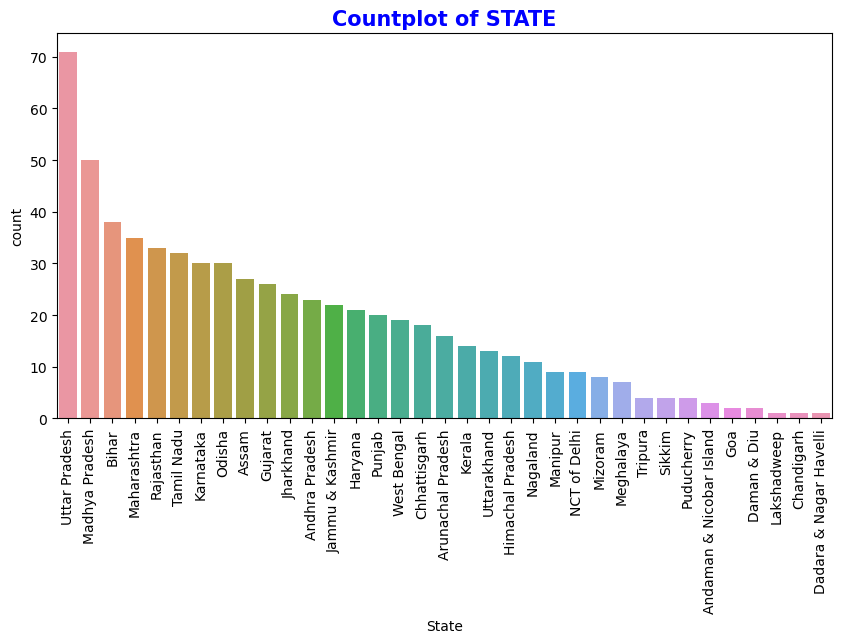

In [15]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(x ="State",data = df, order = df["State"].value_counts().index)
axes.set_title(f"Countplot of STATE",fontsize=15,weight='bold',color="Blue")
axes.set_xticklabels(labels = df["State"].value_counts().index,rotation=90)
plt.show()

In [16]:
df["Gender Ratio"] = df["TOT_F"]/df["TOT_M"]

<font color = "blue">
<font size = 5>
Which state has highest gender ratio and which has the lowest?

In [17]:
y = pd.pivot_table(df,index="State",values="Gender Ratio",aggfunc=np.sum)
round(y.sort_values(by="Gender Ratio",ascending=False).iloc[:1],2)

,Gender Ratio
State,
Uttar Pradesh,93.42


In [18]:
round(y.sort_values(by="Gender Ratio",ascending=True).iloc[:1],2)

,Gender Ratio
State,
Lakshadweep,1.15


<font color = "blue">
<font size = 5>
Which district has the highest & lowest gender ratio?

In [19]:
z = pd.pivot_table(df,index="Area Name",values="Gender Ratio",aggfunc=np.sum)

In [20]:
round(z.sort_values(by="Gender Ratio",ascending=False).iloc[:1],2)

,Gender Ratio
Area Name,
Raigarh,3.86


In [21]:
round(z.sort_values(by="Gender Ratio",ascending=True).iloc[:1],2)

,Gender Ratio
Area Name,
Lakshadweep,1.15


<font color = "blue">
<font size = 5>
Pick 5 variables out of the given 24 variables below for EDA

In [22]:
cats_5 = ['No_HH','M_SC','F_SC','M_ST','F_ST']

In [23]:
cats_5

['No_HH', 'M_SC', 'F_SC', 'M_ST', 'F_ST']

Description of No_HH
----------------------------------------------------------------------------
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64 Distribution of No_HH
----------------------------------------------------------------------------


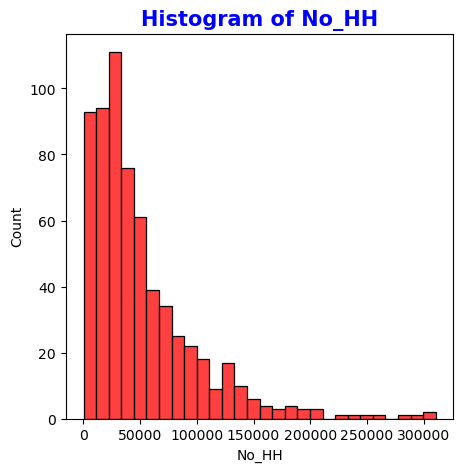

----------------------------------------------------------------------------


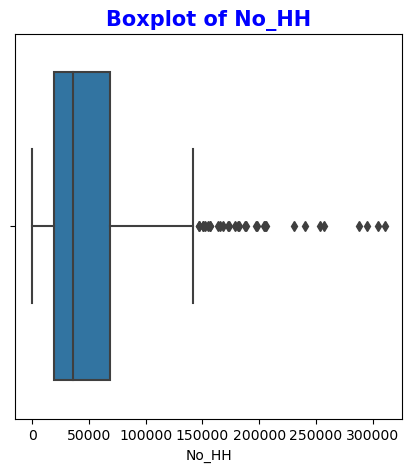

Description of M_SC
----------------------------------------------------------------------------
count       640.000000
mean      13820.946875
std       14426.373130
min           0.000000
25%        3466.250000
50%        9591.500000
75%       19429.750000
max      103307.000000
Name: M_SC, dtype: float64 Distribution of M_SC
----------------------------------------------------------------------------


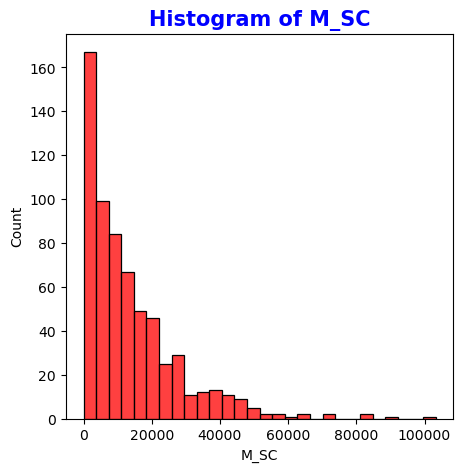

----------------------------------------------------------------------------


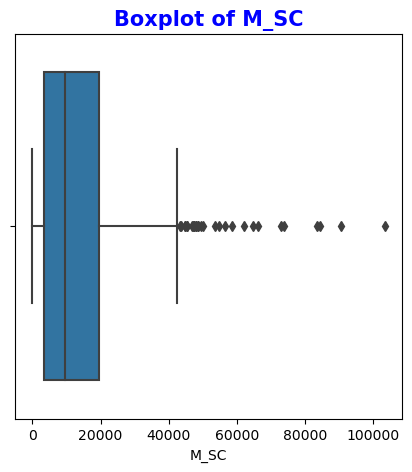

Description of F_SC
----------------------------------------------------------------------------
count       640.000000
mean      20778.392188
std       21727.887713
min           0.000000
25%        5603.250000
50%       13709.000000
75%       29180.000000
max      156429.000000
Name: F_SC, dtype: float64 Distribution of F_SC
----------------------------------------------------------------------------


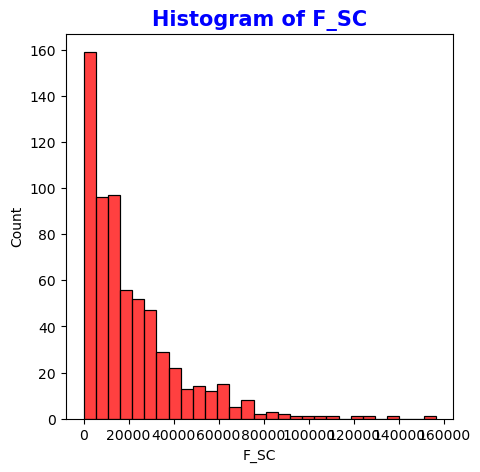

----------------------------------------------------------------------------


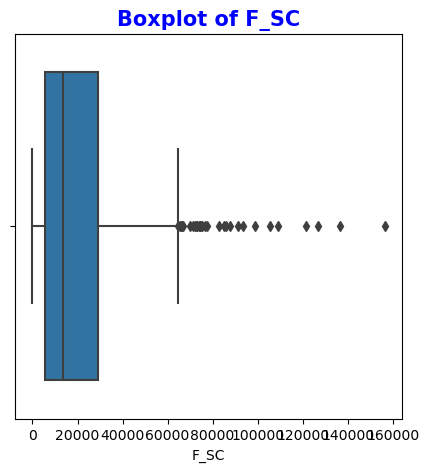

Description of M_ST
----------------------------------------------------------------------------
count      640.000000
mean      6191.807813
std       9912.668948
min          0.000000
25%        293.750000
50%       2333.500000
75%       7658.000000
max      96785.000000
Name: M_ST, dtype: float64 Distribution of M_ST
----------------------------------------------------------------------------


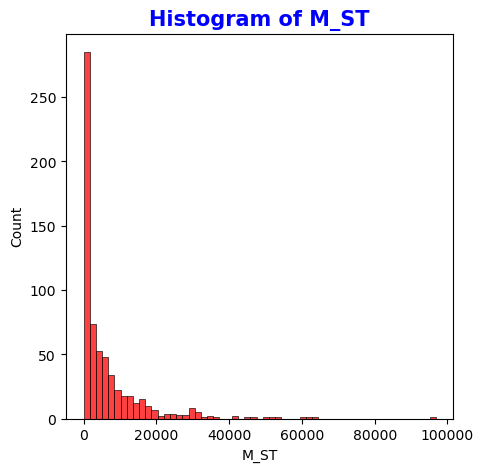

----------------------------------------------------------------------------


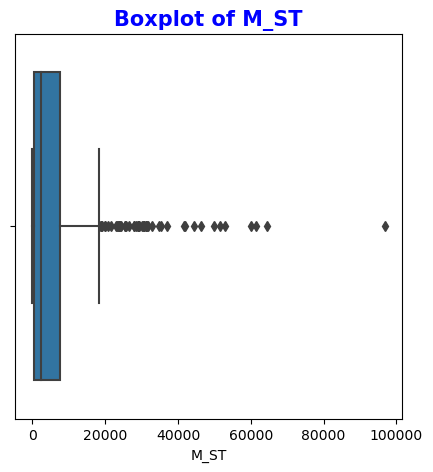

Description of F_ST
----------------------------------------------------------------------------
count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64 Distribution of F_ST
----------------------------------------------------------------------------


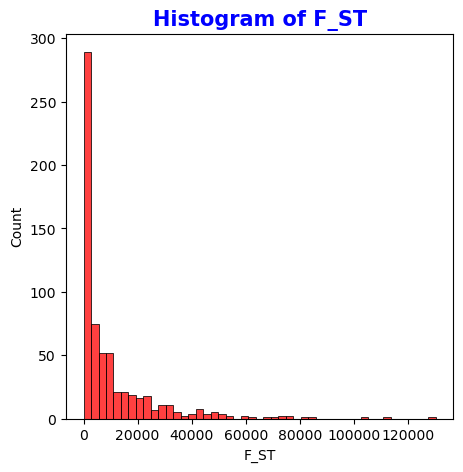

----------------------------------------------------------------------------


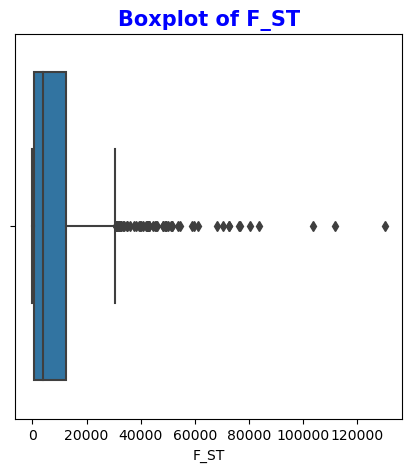

In [24]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure(figsize=(5,5))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], kde=False, color='r');
    plt.title(f"Histogram of {column}",fontsize=15,weight='bold',color="Blue")
    plt.show()
    
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}",fontsize=15,weight='bold',color="Blue")
    plt.show()
    
for i in list(cats_5):
    univariateAnalysis_numeric(i)

In [25]:
df["Gender Ratio_SC"] = df["F_SC"]/df["M_SC"]
df["Gender Ratio_ST"] = df["F_ST"]/df["M_ST"]

<font color = "blue">
<font size = 5>
Which state has highest gender ratio and which has the lowest for Scheduled Castes? 

In [26]:
y = pd.pivot_table(df,index="State",values="Gender Ratio_SC",aggfunc=np.sum)
round(y.sort_values(by="Gender Ratio_SC",ascending=False),2)

,Gender Ratio_SC
State,
Uttar Pradesh,93.96
Madhya Pradesh,80.27
Maharashtra,59.94
Tamil Nadu,59.14
Odisha,55.10
Bihar,51.77
Rajasthan,47.67
Karnataka,46.19
Andhra Pradesh,42.50


<font color = "blue">
<font size = 5>
Which State & District has the Zero Scheduled Castes population?

In [27]:
z_sc = df[(df["F_SC"]==0) & (df["M_SC"]==0)][["Area Name","State"]]

In [28]:
z_sc

,Area Name,State
3,Kargil,Jammu & Kashmir
7,Baramula,Jammu & Kashmir
8,Bandipore,Jammu & Kashmir
10,Ganderbal,Jammu & Kashmir
11,Pulwama,Jammu & Kashmir
12,Shupiyan,Jammu & Kashmir
13,Anantnag,Jammu & Kashmir
244,Tawang,Arunachal Pradesh
245,West Kameng,Arunachal Pradesh
246,East Kameng,Arunachal Pradesh


<font color = "blue">
<font size = 5>
Which state has highest gender ratio and which has the lowest for Scheduled Tribes?

In [29]:
y = pd.pivot_table(df,index="State",values="Gender Ratio_ST",aggfunc=np.sum)
round(y.sort_values(by="Gender Ratio_ST",ascending=False),2)

,Gender Ratio_ST
State,
Uttar Pradesh,114.04
Madhya Pradesh,83.07
Maharashtra,60.97
Tamil Nadu,59.25
Bihar,58.03
Odisha,56.02
Rajasthan,47.99
Karnataka,47.05
Andhra Pradesh,42.30


<font color = "blue">
<font size = 5>
Which State & District has the Zero Scheduled Tribe population?

In [30]:
z_st = df[(df["F_ST"]==0) & (df["M_ST"]==0)][["Area Name","State"]]

In [31]:
z_st

,Area Name,State
34,Gurdaspur,Punjab
35,Kapurthala,Punjab
36,Jalandhar,Punjab
37,Hoshiarpur,Punjab
38,Shahid Bhagat Singh Nagar,Punjab
39,Fatehgarh Sahib,Punjab
40,Ludhiana,Punjab
41,Moga,Punjab
42,Firozpur,Punjab
43,Muktsar,Punjab


In [32]:
corr = df[cats_5].corr(method='pearson')
corr

,No_HH,M_SC,F_SC,M_ST,F_ST
No_HH,1.000000,0.775309,0.823847,0.149627,0.165102
M_SC,0.775309,1.000000,0.985071,-0.045666,-0.047825
F_SC,0.823847,0.985071,1.000000,-0.014122,-0.009190
M_ST,0.149627,-0.045666,-0.014122,1.000000,0.988047
F_ST,0.165102,-0.047825,-0.009190,0.988047,1.000000


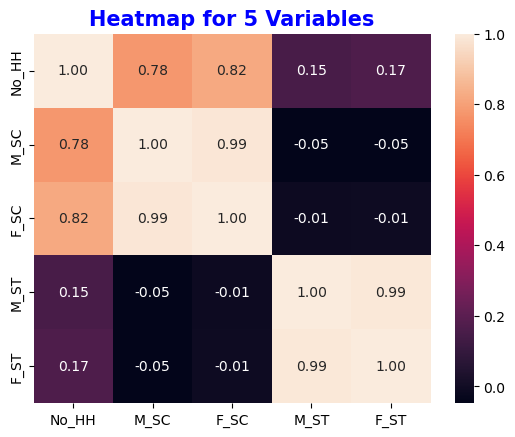

In [33]:
sns.heatmap(df[cats_5].corr(), annot=True,fmt='.2f')
plt.title("Heatmap for 5 Variables",fontsize=15,weight='bold',color="Blue")
plt.show()

In [34]:
data = df.drop(["State Code","Dist.Code","State","Area Name","Gender Ratio","Gender Ratio_SC","Gender Ratio_ST"],axis=1)

In [35]:
data

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3333,8154,11781,1146,1203,21,30,0,0,6916,...,32,47,0,0,0,0,0,0,32,47
636,10612,12346,21691,1544,1533,2234,4155,0,0,10292,...,155,337,3,14,38,130,4,23,110,170
637,1275,1549,2630,227,225,0,0,1012,1750,1187,...,104,134,9,4,2,6,17,47,76,77
638,3762,5200,8012,723,664,0,0,28,50,4206,...,136,172,24,44,11,21,1,4,100,103


<font color = "blue">
<font size = 5>
Part 2 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

----------------------------------------------------------------------------


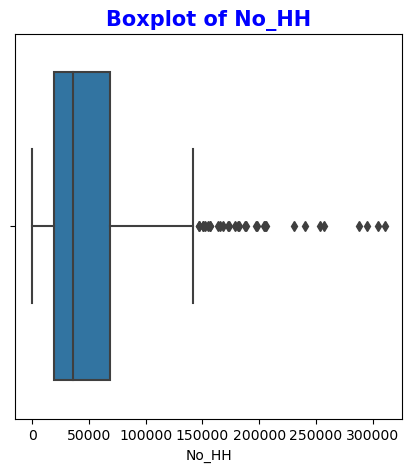

----------------------------------------------------------------------------


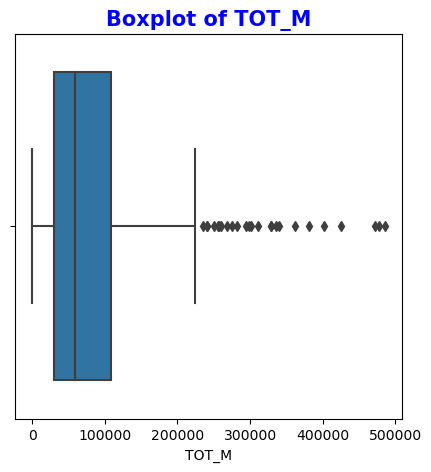

----------------------------------------------------------------------------


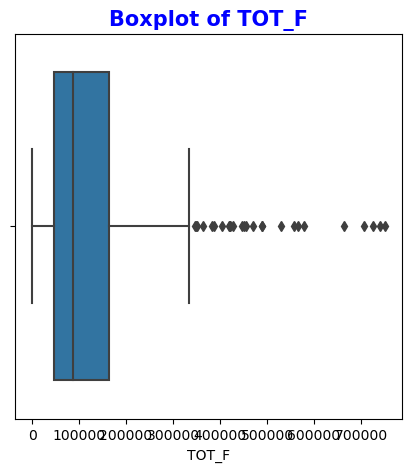

----------------------------------------------------------------------------


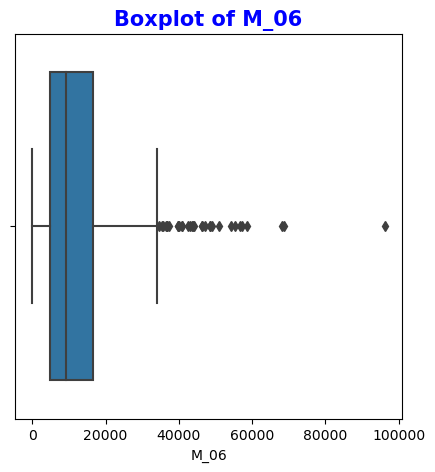

----------------------------------------------------------------------------


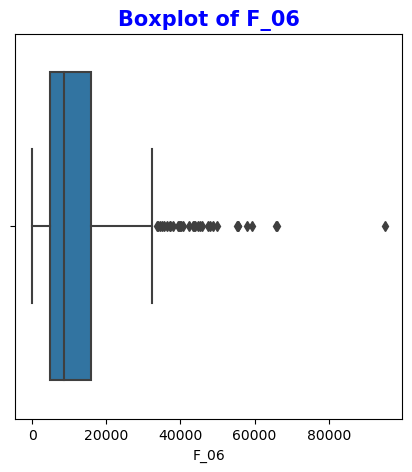

----------------------------------------------------------------------------


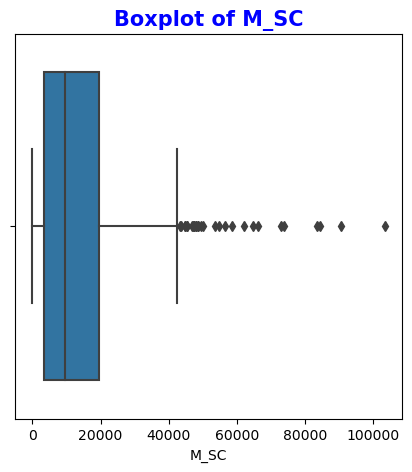

----------------------------------------------------------------------------


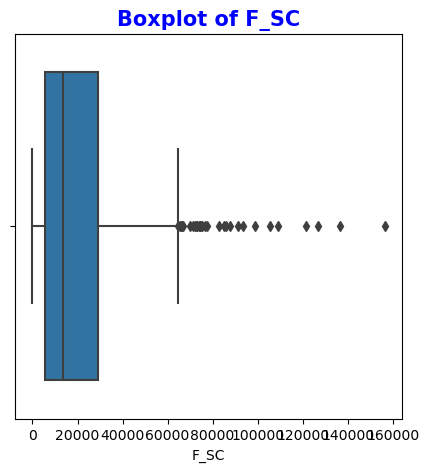

----------------------------------------------------------------------------


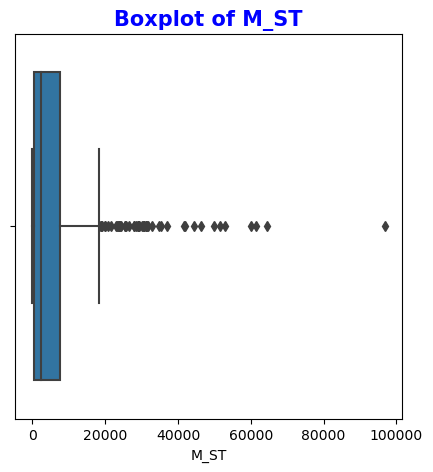

----------------------------------------------------------------------------


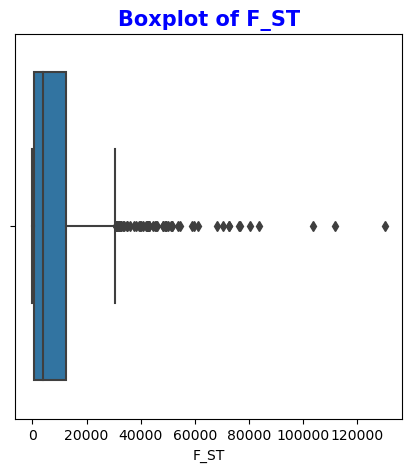

----------------------------------------------------------------------------


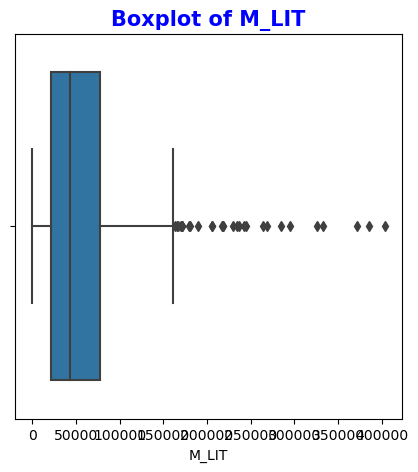

----------------------------------------------------------------------------


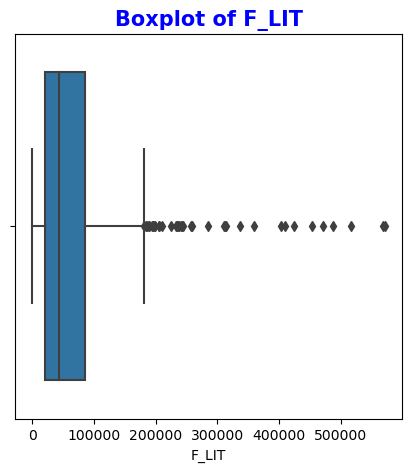

----------------------------------------------------------------------------


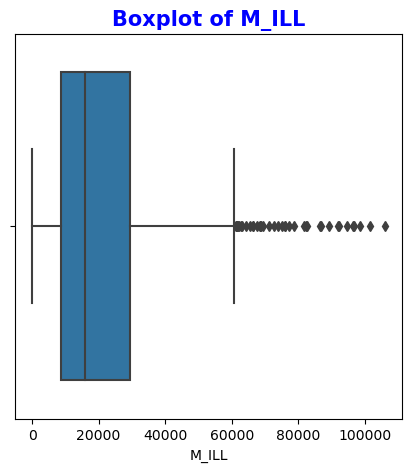

----------------------------------------------------------------------------


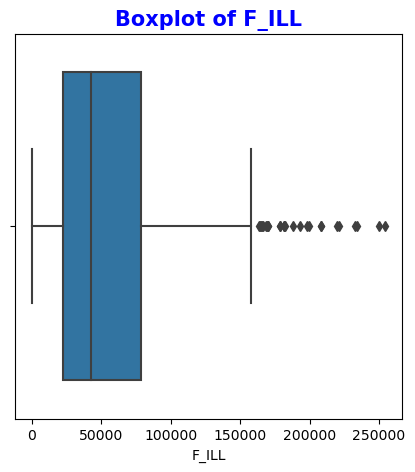

----------------------------------------------------------------------------


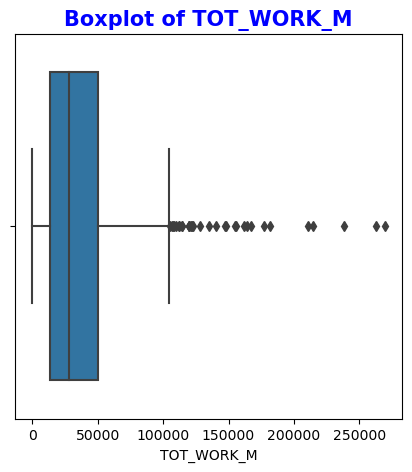

----------------------------------------------------------------------------


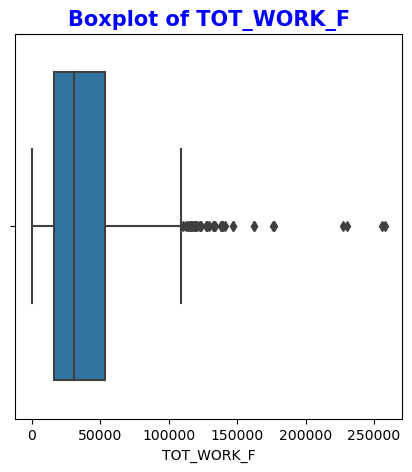

----------------------------------------------------------------------------


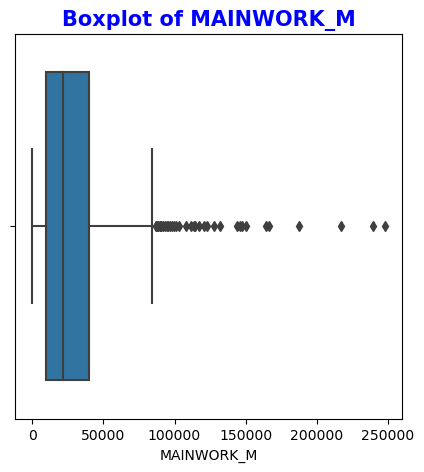

----------------------------------------------------------------------------


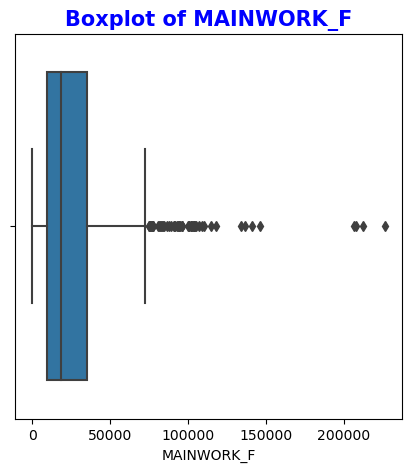

----------------------------------------------------------------------------


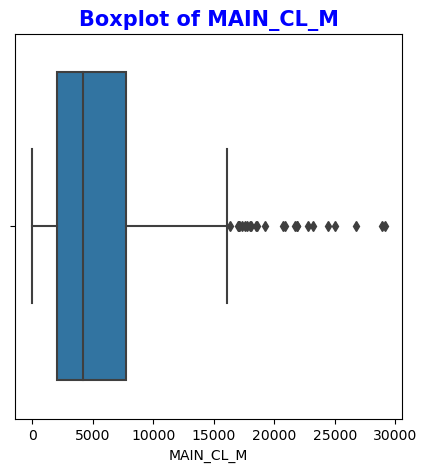

----------------------------------------------------------------------------


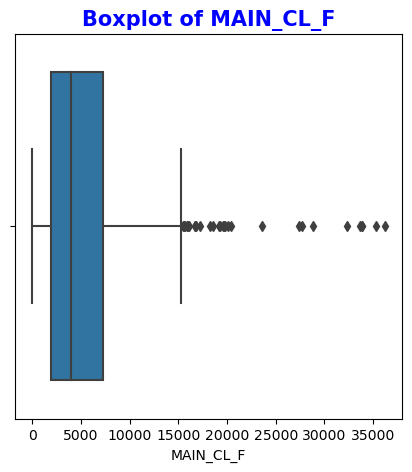

----------------------------------------------------------------------------


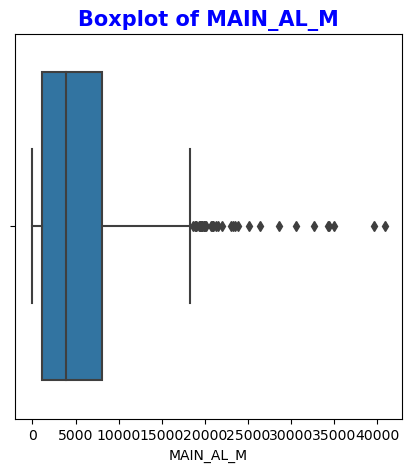

----------------------------------------------------------------------------


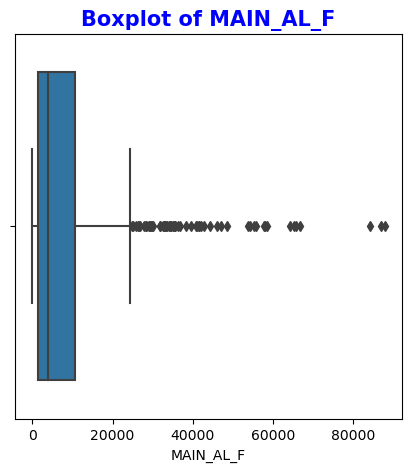

----------------------------------------------------------------------------


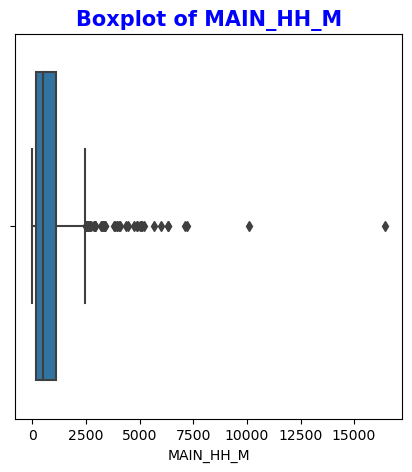

----------------------------------------------------------------------------


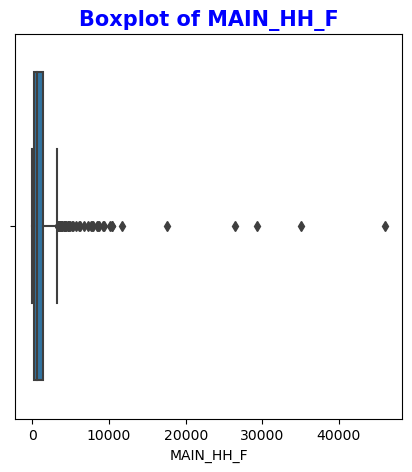

----------------------------------------------------------------------------


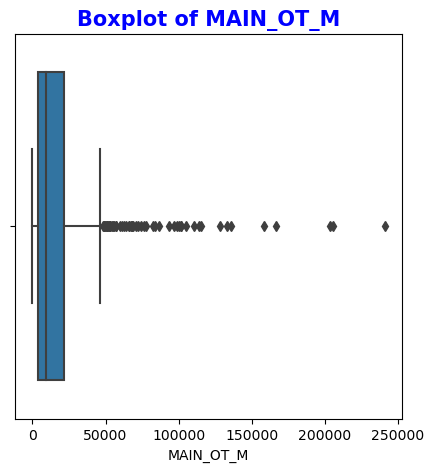

----------------------------------------------------------------------------


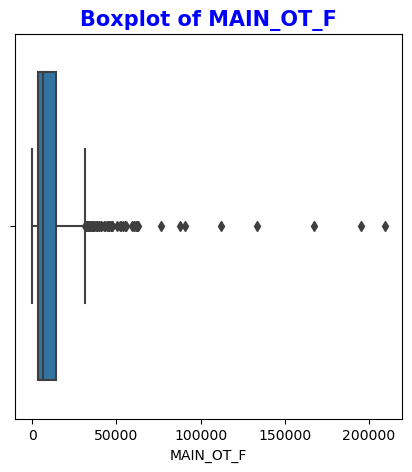

----------------------------------------------------------------------------


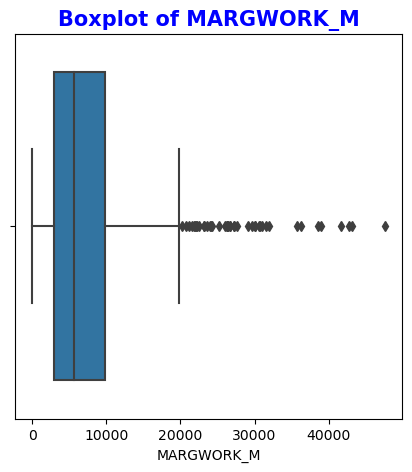

----------------------------------------------------------------------------


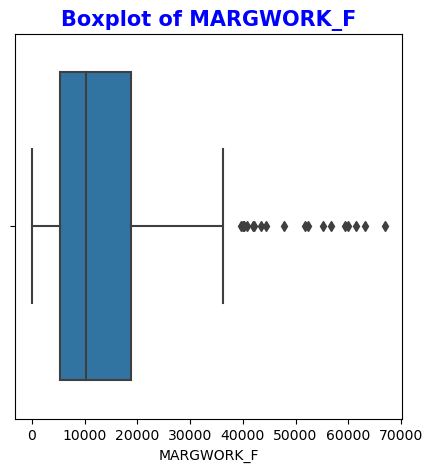

----------------------------------------------------------------------------


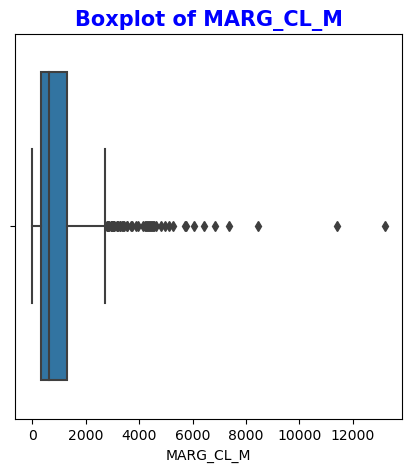

----------------------------------------------------------------------------


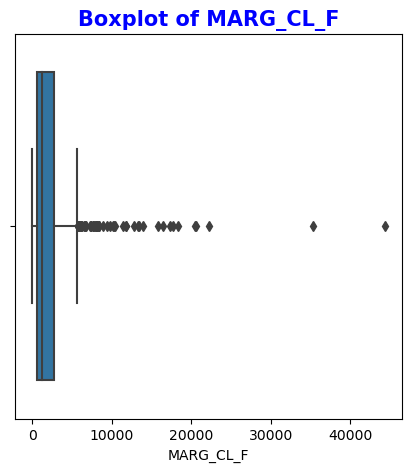

----------------------------------------------------------------------------


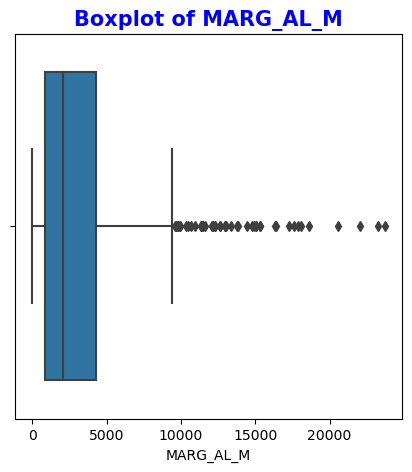

----------------------------------------------------------------------------


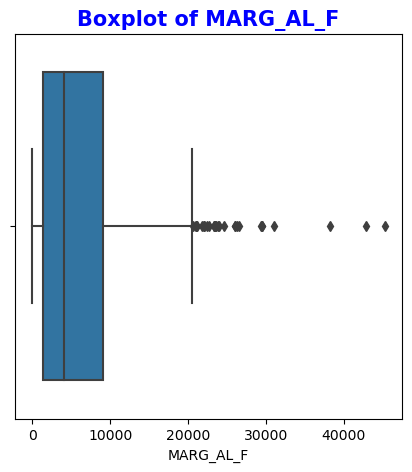

----------------------------------------------------------------------------


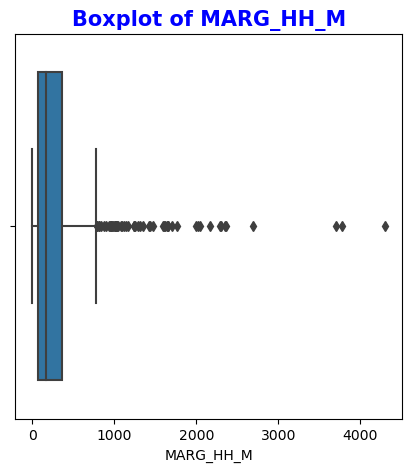

----------------------------------------------------------------------------


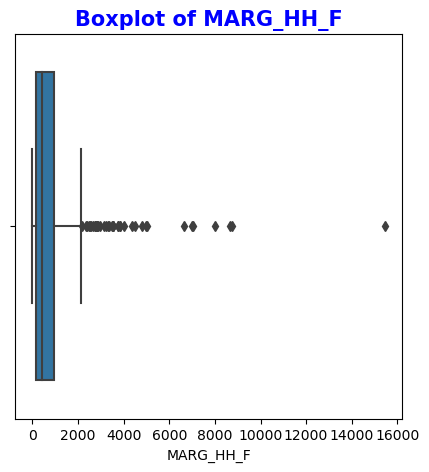

----------------------------------------------------------------------------


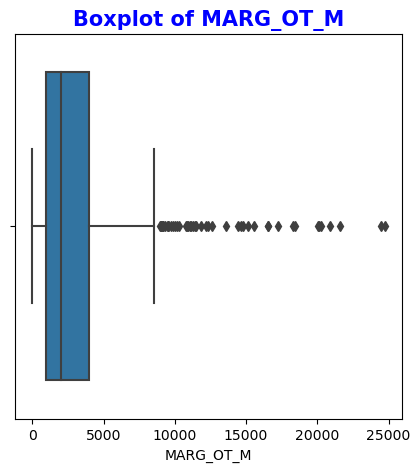

----------------------------------------------------------------------------


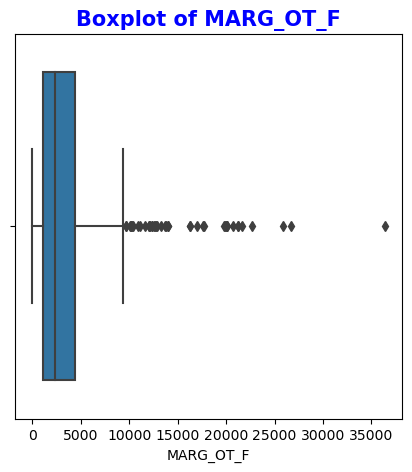

----------------------------------------------------------------------------


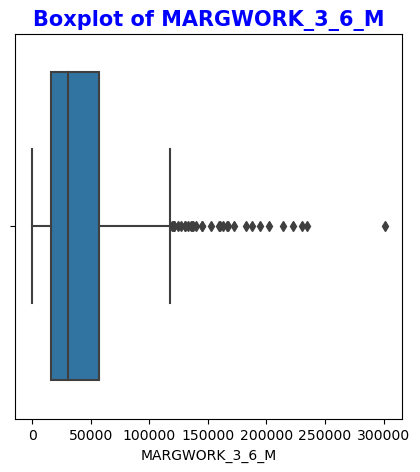

----------------------------------------------------------------------------


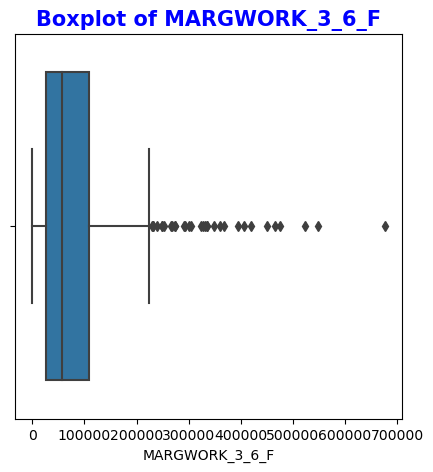

----------------------------------------------------------------------------


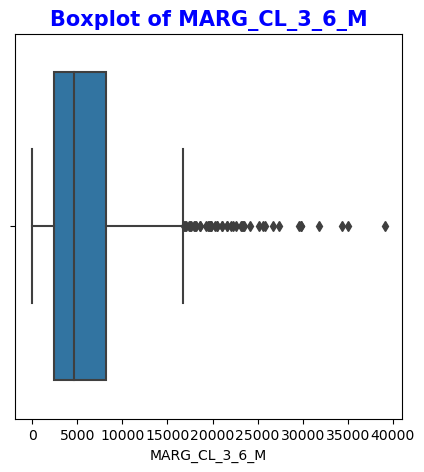

----------------------------------------------------------------------------


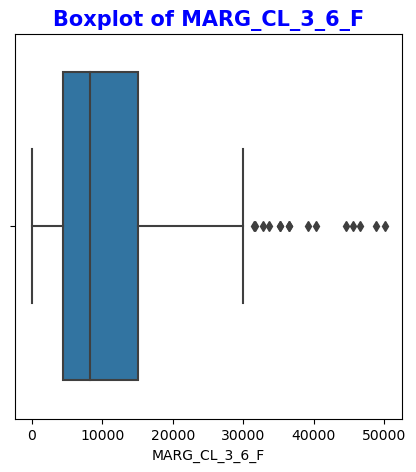

----------------------------------------------------------------------------


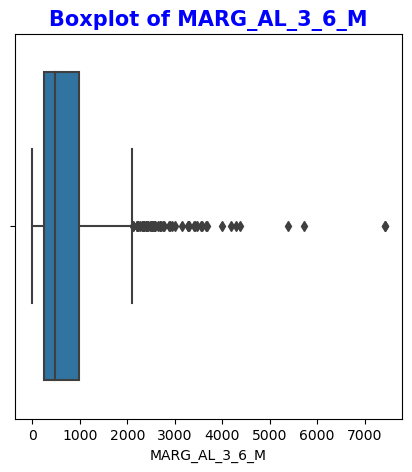

----------------------------------------------------------------------------


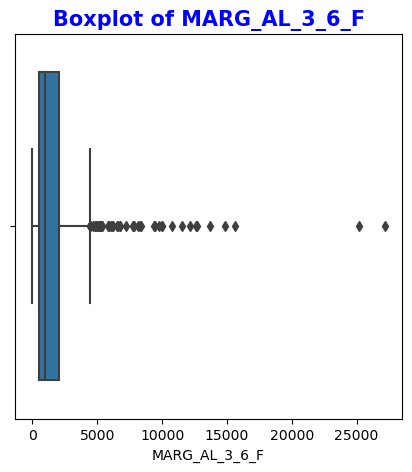

----------------------------------------------------------------------------


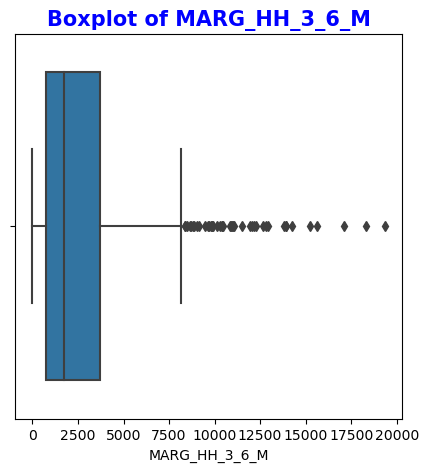

----------------------------------------------------------------------------


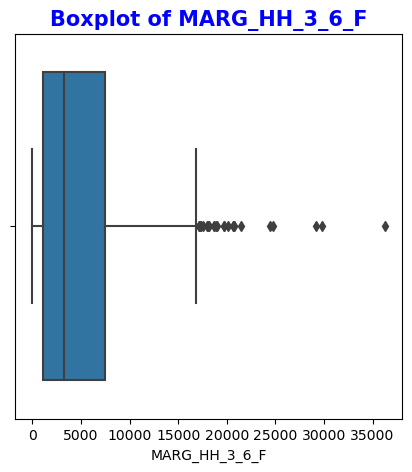

----------------------------------------------------------------------------


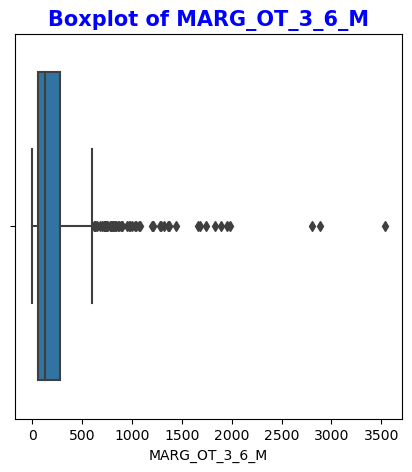

----------------------------------------------------------------------------


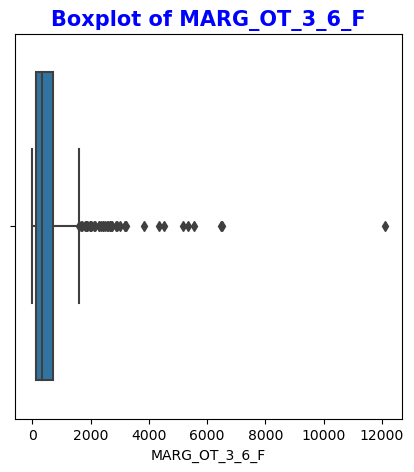

----------------------------------------------------------------------------


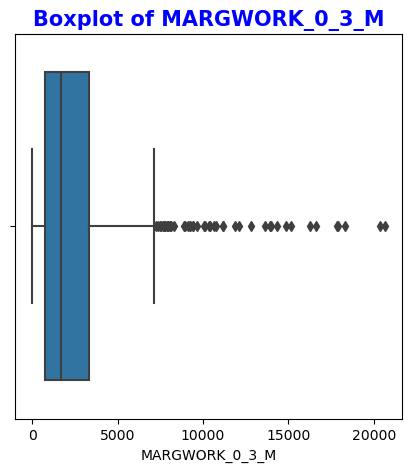

----------------------------------------------------------------------------


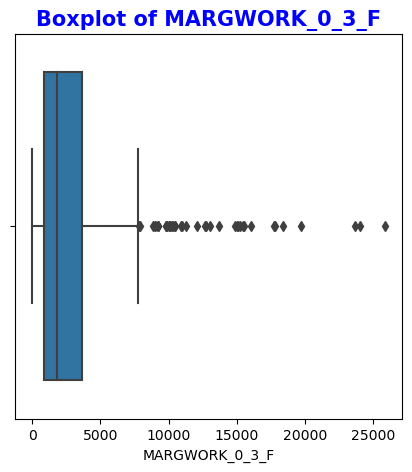

----------------------------------------------------------------------------


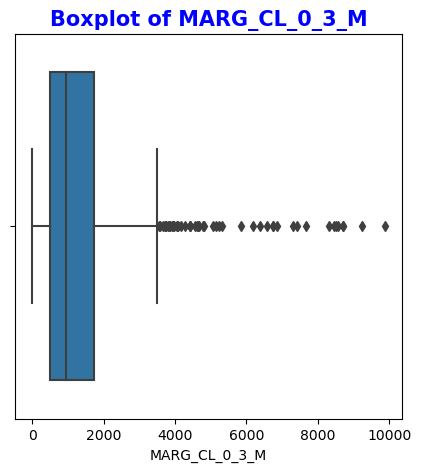

----------------------------------------------------------------------------


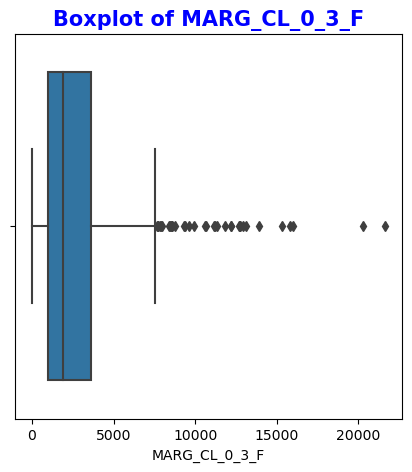

----------------------------------------------------------------------------


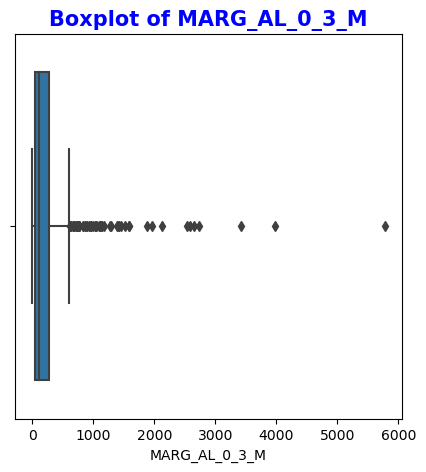

----------------------------------------------------------------------------


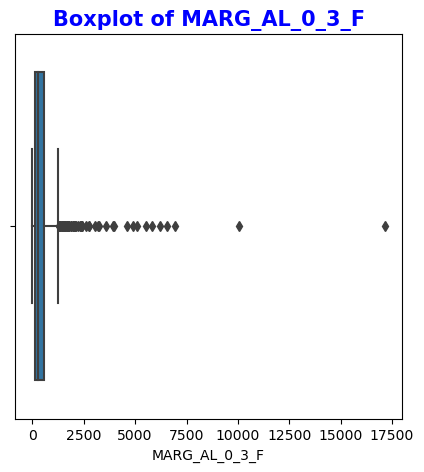

----------------------------------------------------------------------------


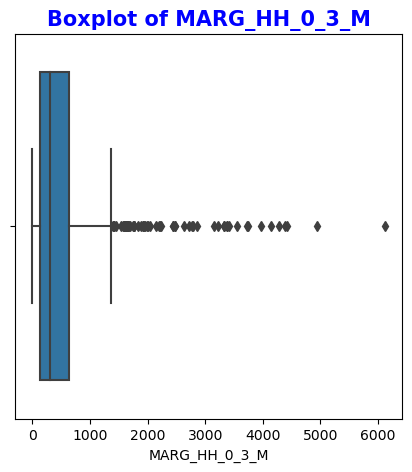

----------------------------------------------------------------------------


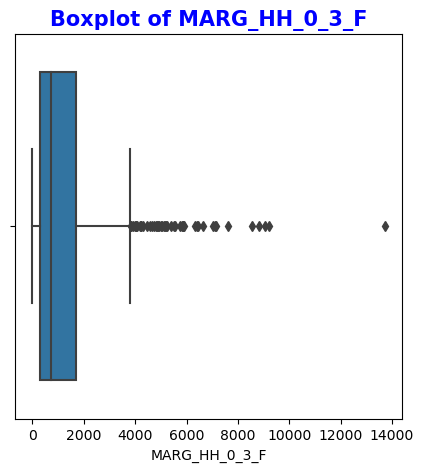

----------------------------------------------------------------------------


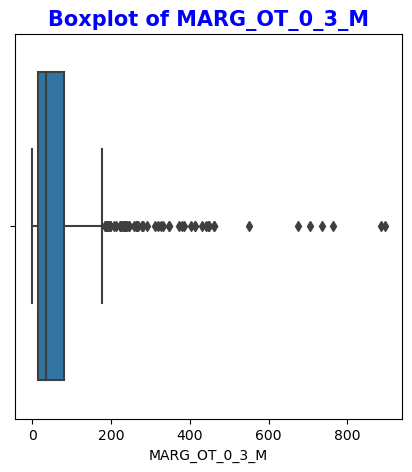

----------------------------------------------------------------------------


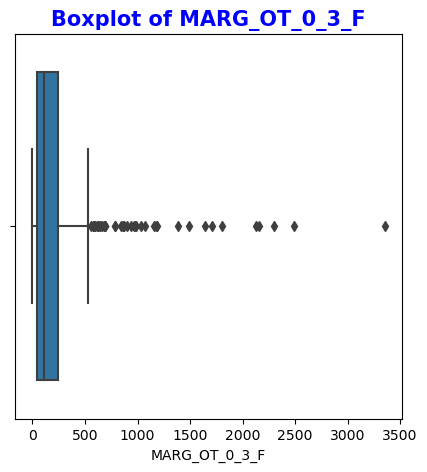

----------------------------------------------------------------------------


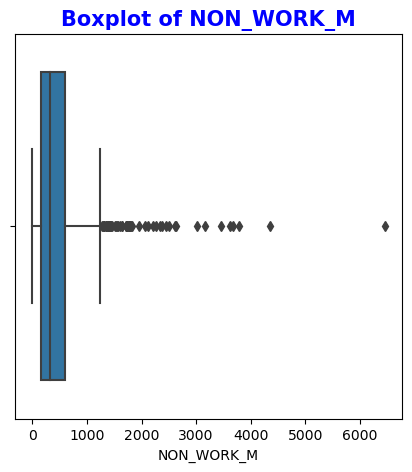

----------------------------------------------------------------------------


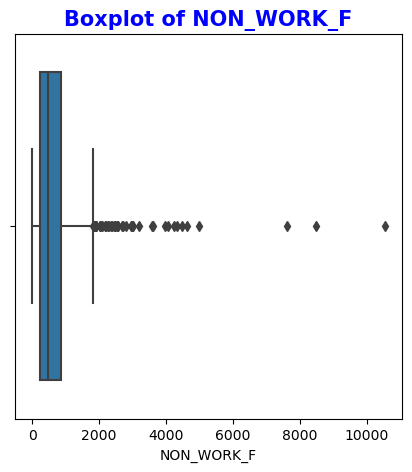

In [36]:
def Boxplot_numeric(column):
    
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}",fontsize=15,weight='bold',color="Blue")
    plt.show()
    
for i in list(data.columns):
    Boxplot_numeric(i)

In [37]:
from sklearn.preprocessing import StandardScaler
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)

In [38]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,4.440892e-17,1.000782,-1.057697,-0.659882,-0.319887,0.367358,5.389586
TOT_M,640.0,-8.881784e-17,1.000782,-1.084858,-0.677956,-0.294592,0.381549,5.529690
TOT_F,640.0,-4.440892e-17,1.000782,-1.071906,-0.668250,-0.305233,0.368945,5.532633
M_06,640.0,-5.551115e-17,1.000782,-1.066236,-0.659189,-0.274114,0.366445,7.301993
F_06,640.0,6.661338e-17,1.000782,-1.050264,-0.642376,-0.289756,0.349898,7.350309
M_SC,640.0,5.551115e-18,1.000782,-0.958783,-0.718323,-0.293404,0.389092,6.207800
F_SC,640.0,-5.551115e-17,1.000782,-0.957049,-0.698964,-0.325615,0.386976,6.248040
M_ST,640.0,-4.440892e-17,1.000782,-0.625124,-0.595467,-0.389534,0.148027,9.146281
F_ST,640.0,-2.220446e-17,1.000782,-0.640197,-0.613122,-0.398476,0.146540,7.562324
M_LIT,640.0,-4.440892e-17,1.000782,-1.032495,-0.656385,-0.273410,0.358381,6.180672


----------------------------------------------------------------------------


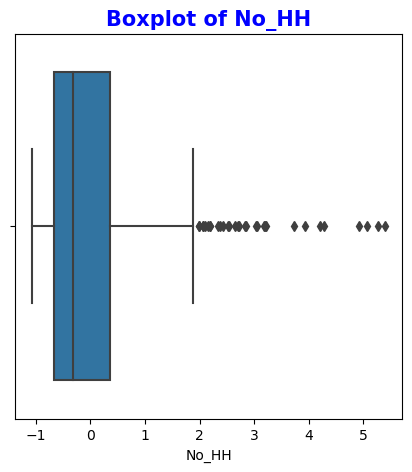

----------------------------------------------------------------------------


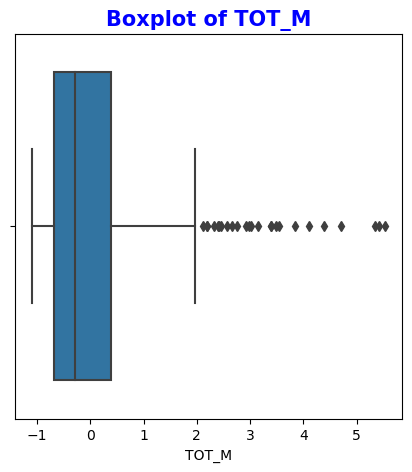

----------------------------------------------------------------------------


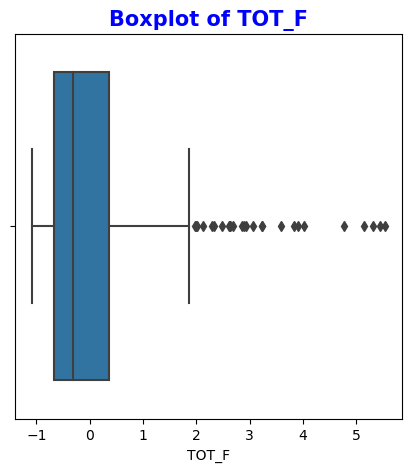

----------------------------------------------------------------------------


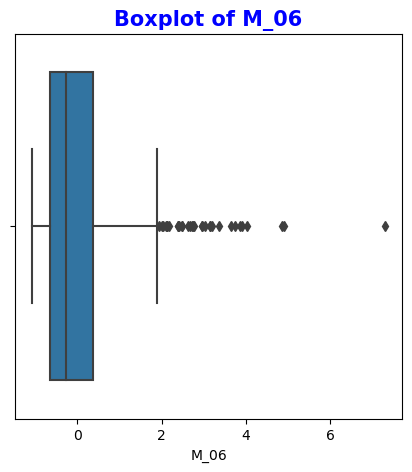

----------------------------------------------------------------------------


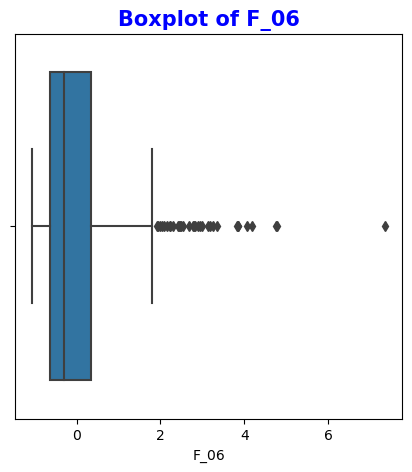

----------------------------------------------------------------------------


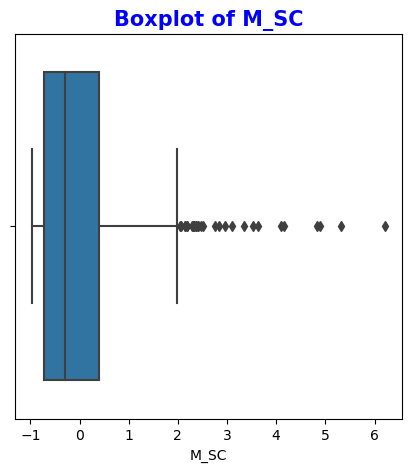

----------------------------------------------------------------------------


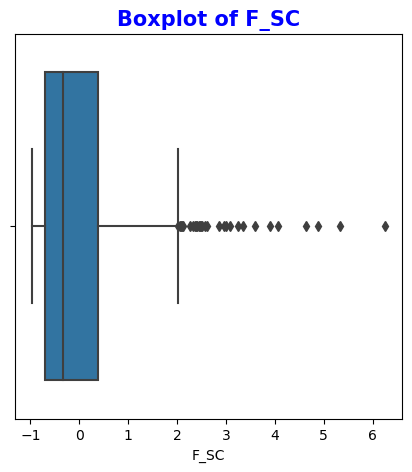

----------------------------------------------------------------------------


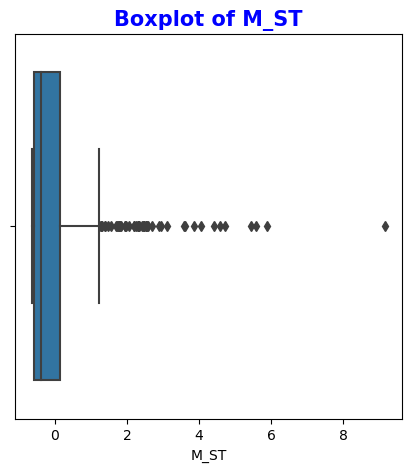

----------------------------------------------------------------------------


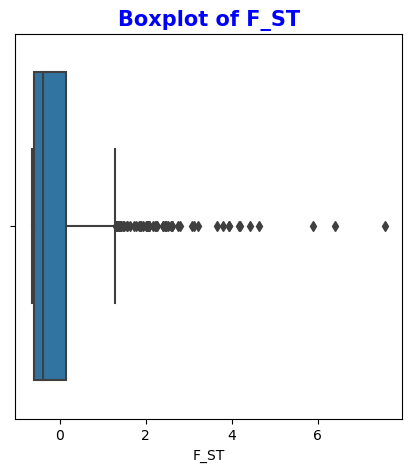

----------------------------------------------------------------------------


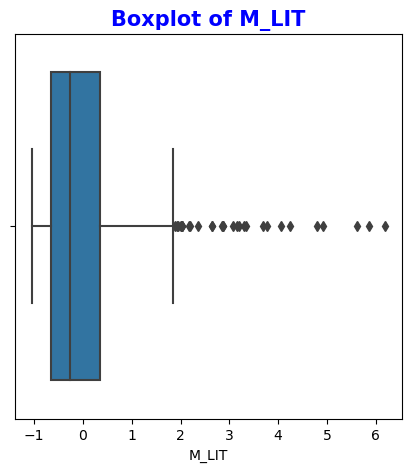

----------------------------------------------------------------------------


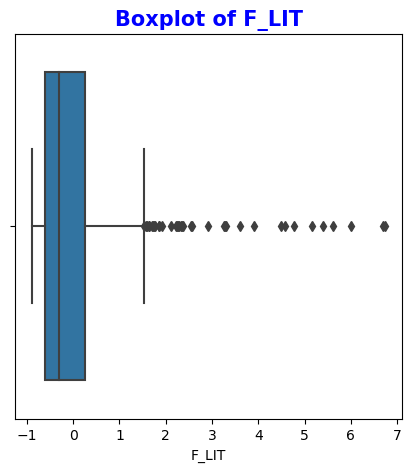

----------------------------------------------------------------------------


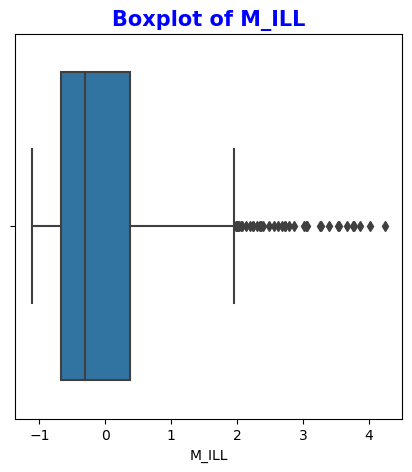

----------------------------------------------------------------------------


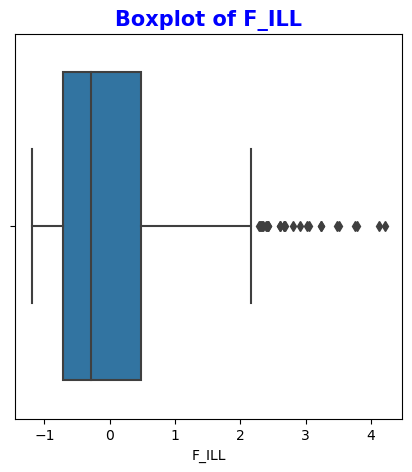

----------------------------------------------------------------------------


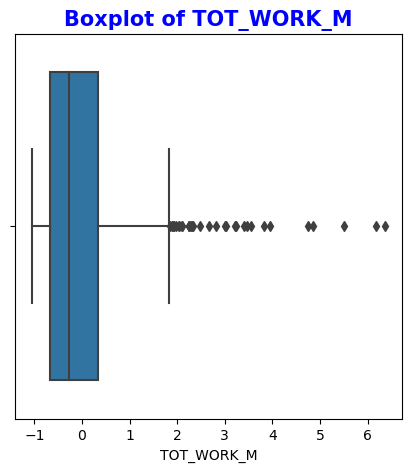

----------------------------------------------------------------------------


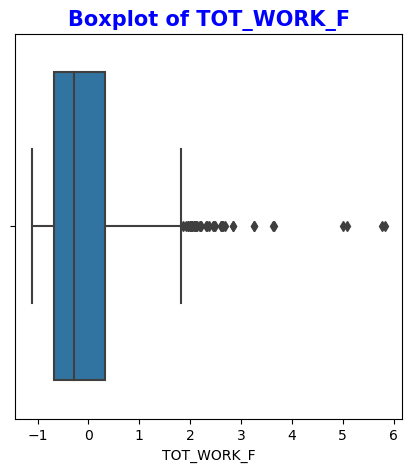

----------------------------------------------------------------------------


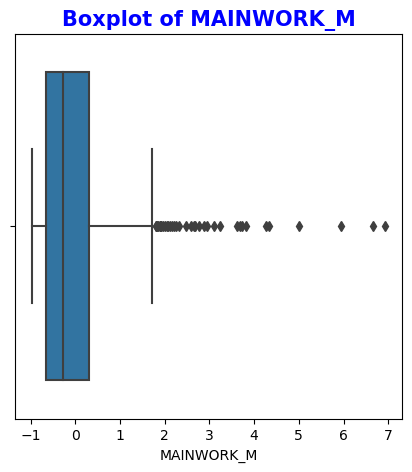

----------------------------------------------------------------------------


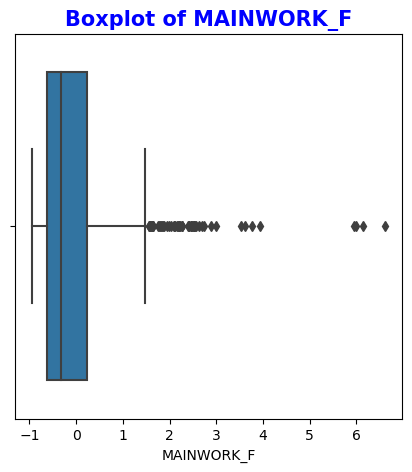

----------------------------------------------------------------------------


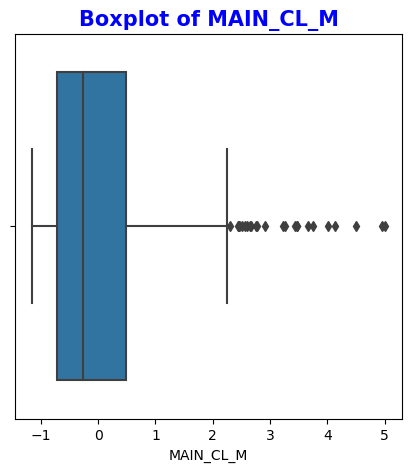

----------------------------------------------------------------------------


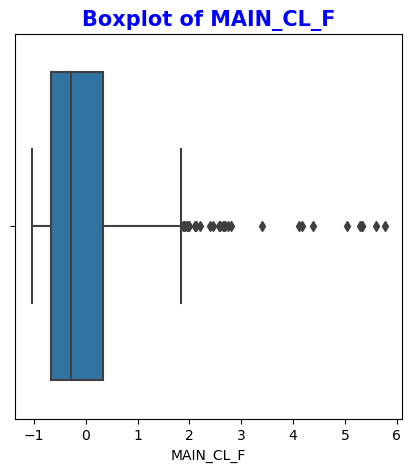

----------------------------------------------------------------------------


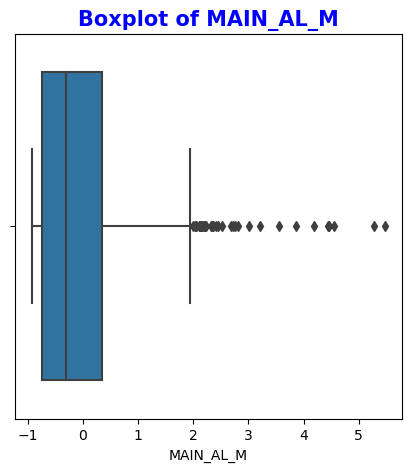

----------------------------------------------------------------------------


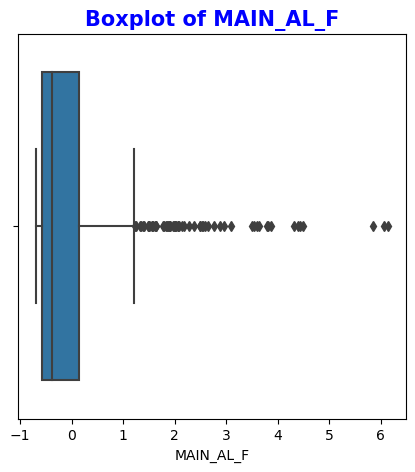

----------------------------------------------------------------------------


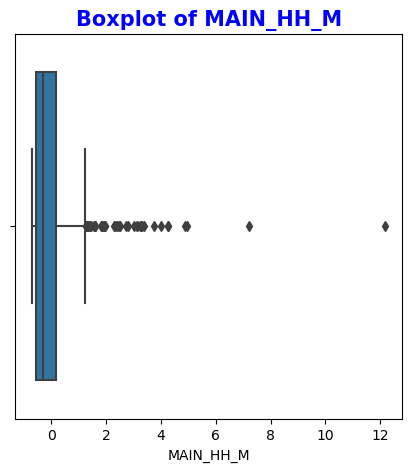

----------------------------------------------------------------------------


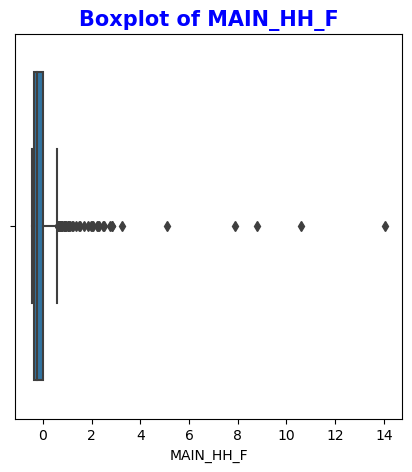

----------------------------------------------------------------------------


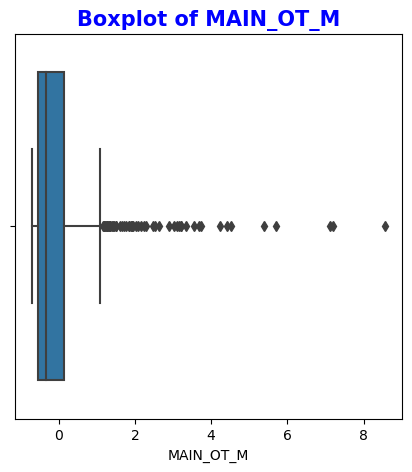

----------------------------------------------------------------------------


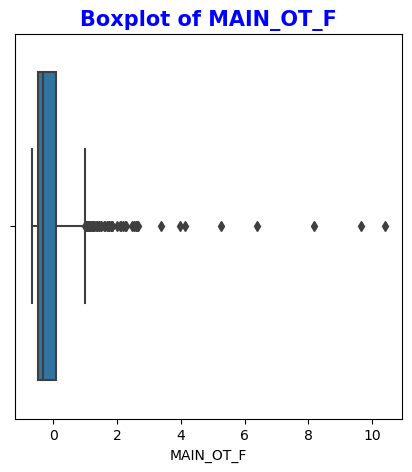

----------------------------------------------------------------------------


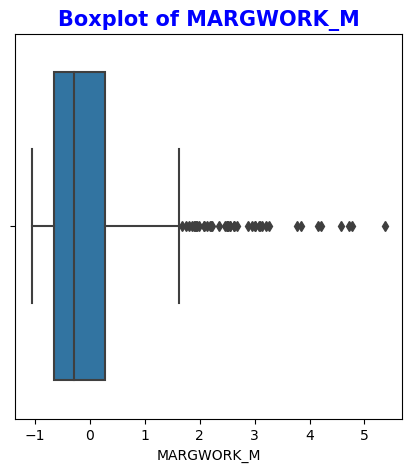

----------------------------------------------------------------------------


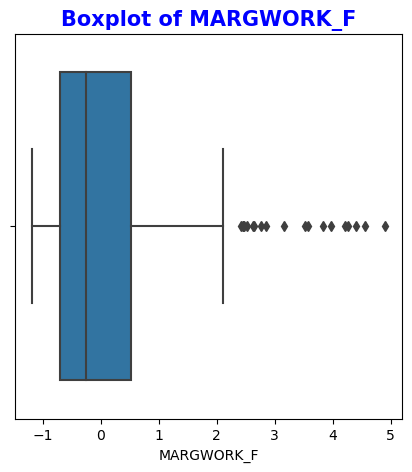

----------------------------------------------------------------------------


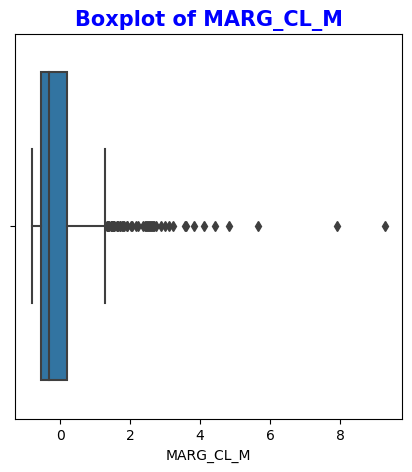

----------------------------------------------------------------------------


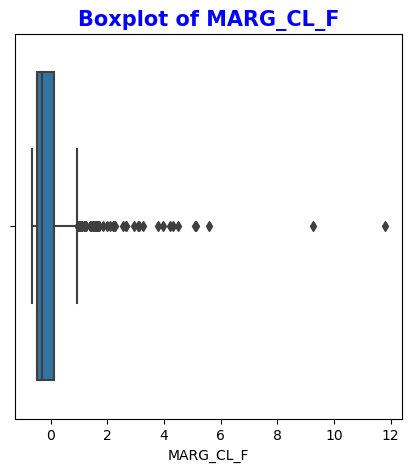

----------------------------------------------------------------------------


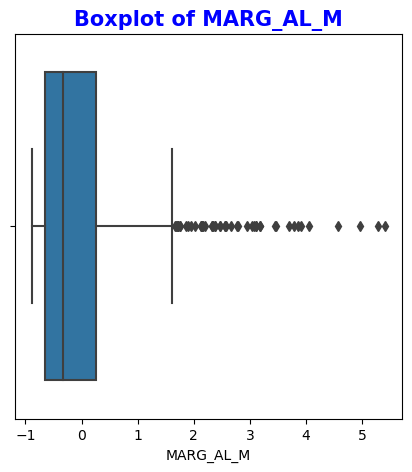

----------------------------------------------------------------------------


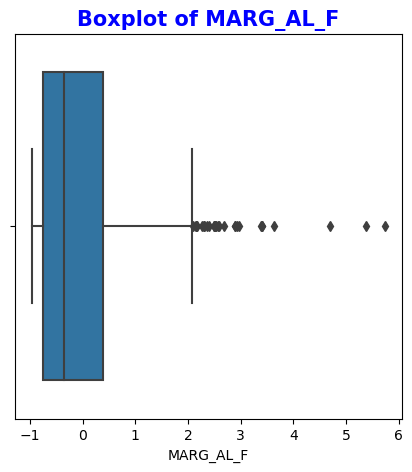

----------------------------------------------------------------------------


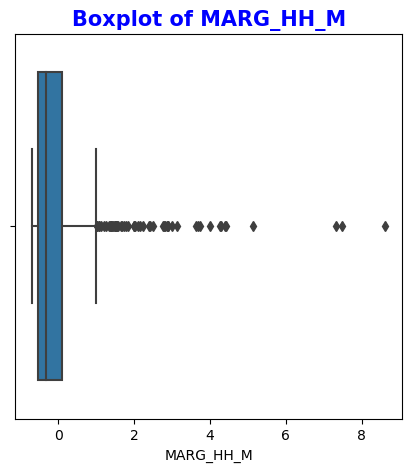

----------------------------------------------------------------------------


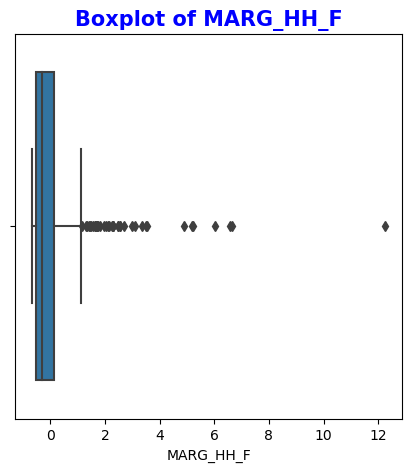

----------------------------------------------------------------------------


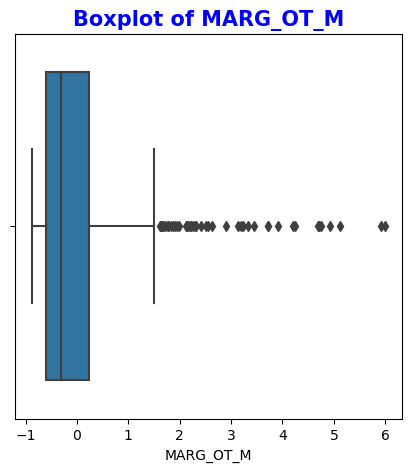

----------------------------------------------------------------------------


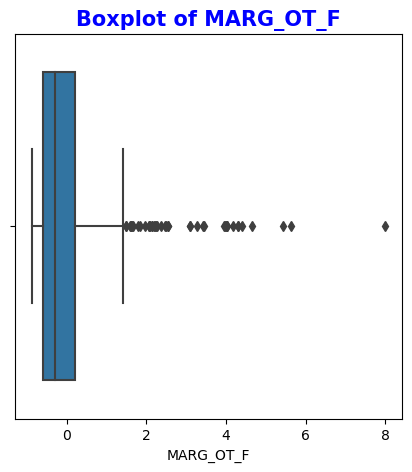

----------------------------------------------------------------------------


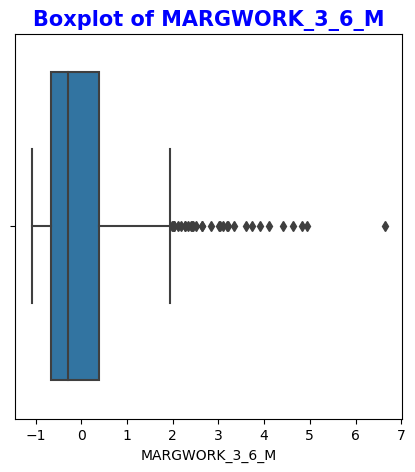

----------------------------------------------------------------------------


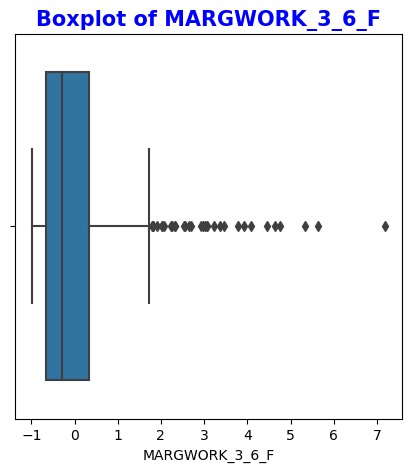

----------------------------------------------------------------------------


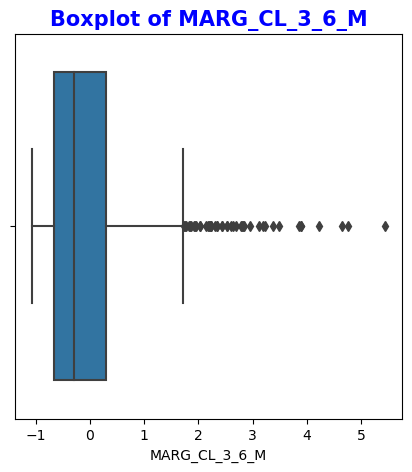

----------------------------------------------------------------------------


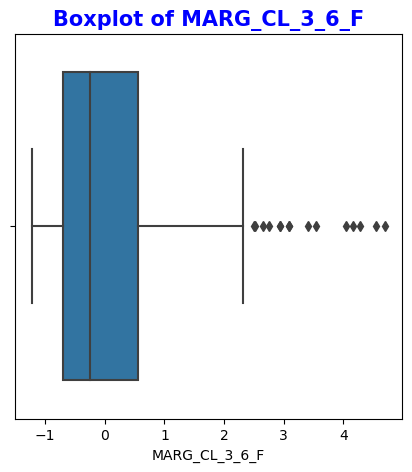

----------------------------------------------------------------------------


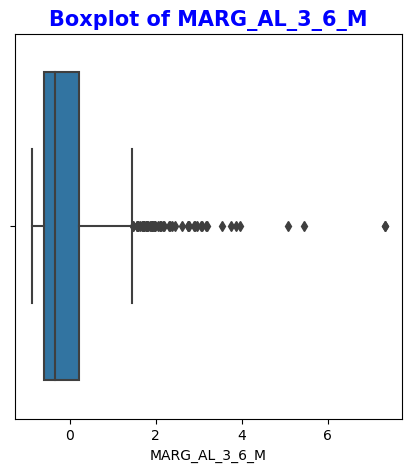

----------------------------------------------------------------------------


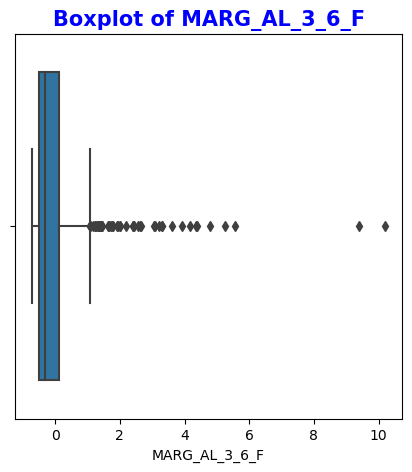

----------------------------------------------------------------------------


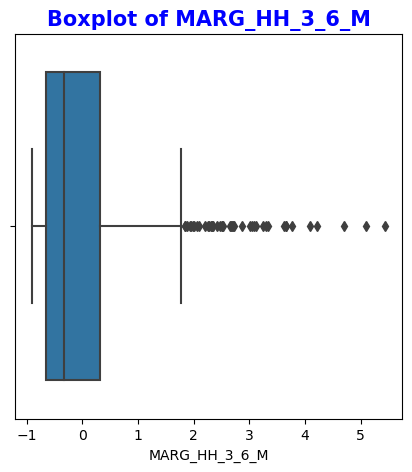

----------------------------------------------------------------------------


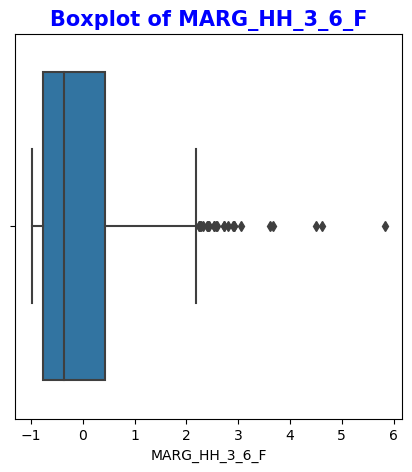

----------------------------------------------------------------------------


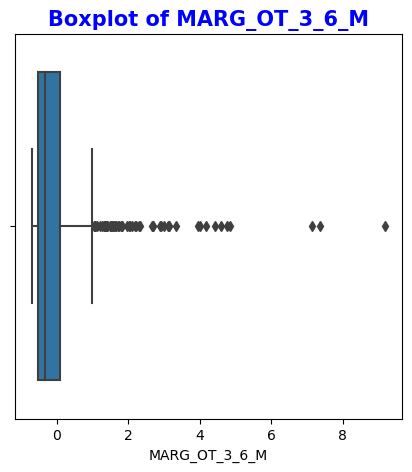

----------------------------------------------------------------------------


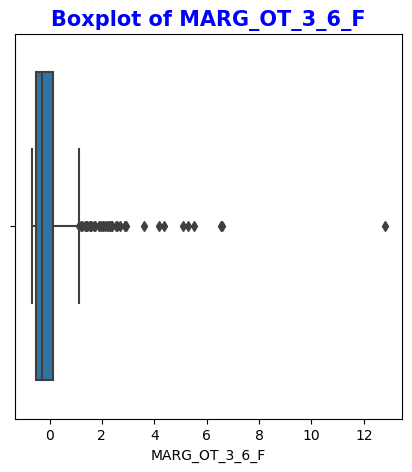

----------------------------------------------------------------------------


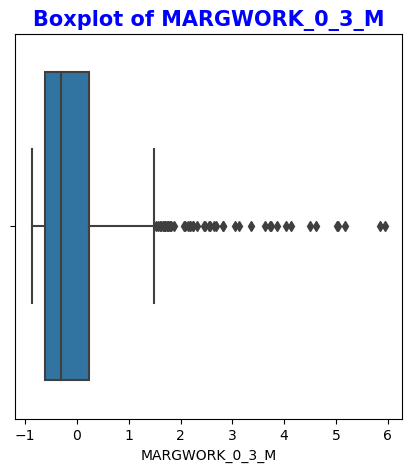

----------------------------------------------------------------------------


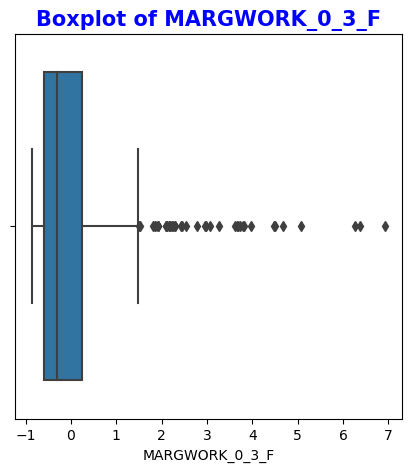

----------------------------------------------------------------------------


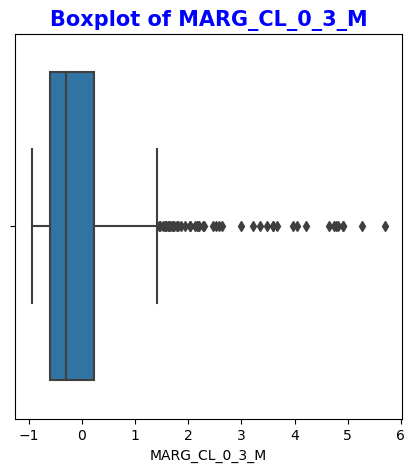

----------------------------------------------------------------------------


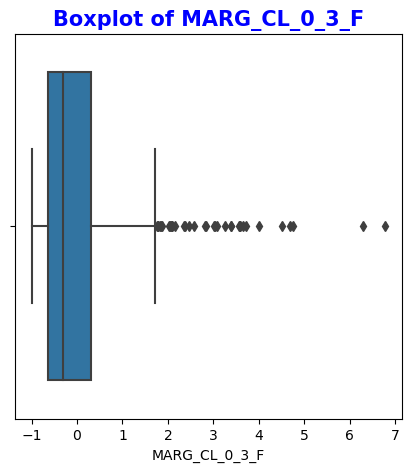

----------------------------------------------------------------------------


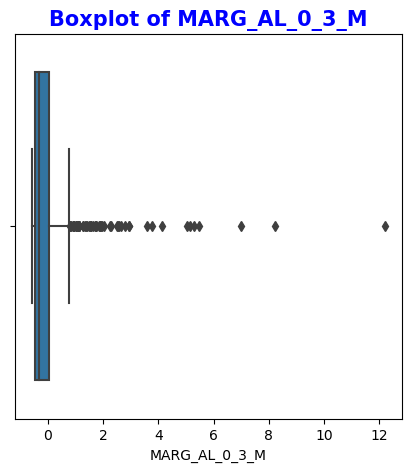

----------------------------------------------------------------------------


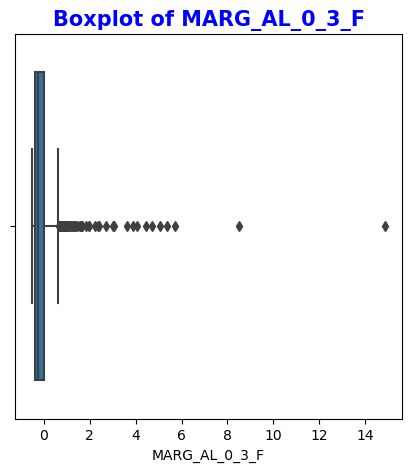

----------------------------------------------------------------------------


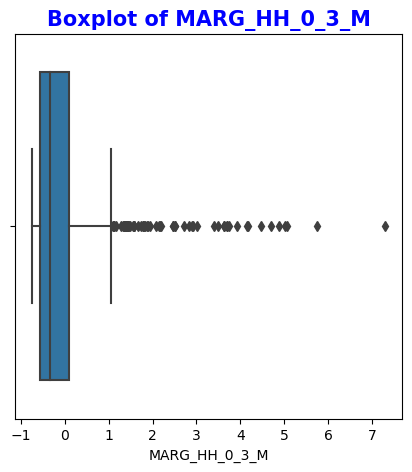

----------------------------------------------------------------------------


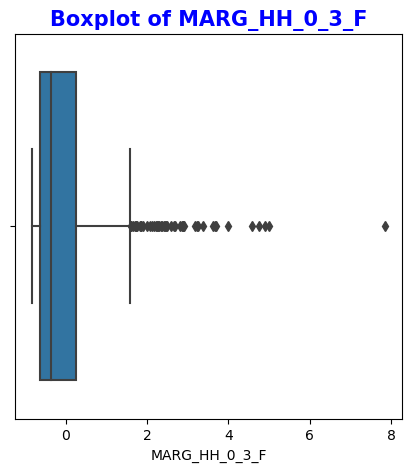

----------------------------------------------------------------------------


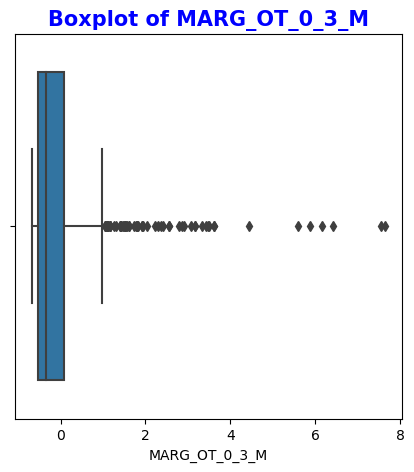

----------------------------------------------------------------------------


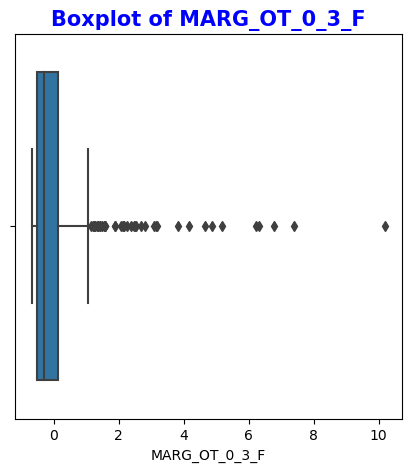

----------------------------------------------------------------------------


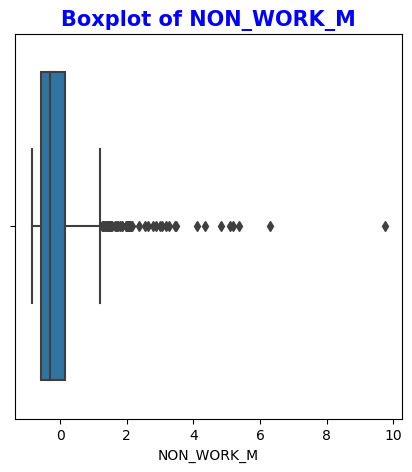

----------------------------------------------------------------------------


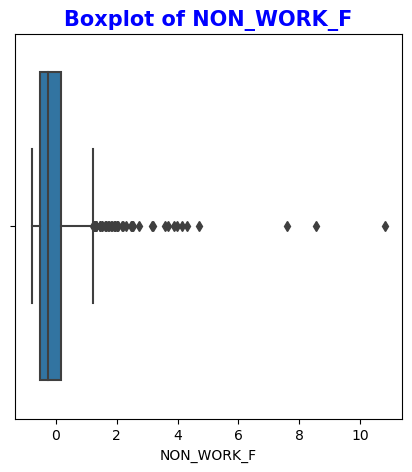

In [39]:
def Boxplot_numeric_scaled(column):
    
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data_scaled[column])
    plt.title(f"Boxplot of {column}",fontsize=15,weight='bold',color="Blue")
    plt.show()
    
for i in list(data_scaled.columns):
    Boxplot_numeric_scaled(i)

In [40]:
def outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    IQR_L = Q3-(1.5 * IQR)
    IQR_U = Q3+(1.5 * IQR)
    return IQR_L,IQR_U

In [41]:
for i in data.columns:
    LL,UL = outliers(data[i])
    data[i] = np.where(data[i]<LL,LL,data[i])
    data[i] = np.where(data[i]>UL,UL,data[i])

In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,48515.542188,39308.008223,350.0,19484.00,35837.0,68892.00,143004.000
TOT_M,640.0,76041.601953,60233.862106,391.0,30228.00,58339.0,107918.50,224454.250
TOT_F,640.0,116079.808594,92154.544396,698.0,46517.75,87724.5,164251.75,340852.750
M_06,640.0,11638.096875,9253.649941,56.0,4733.75,9159.0,16520.25,34200.000
F_06,640.0,11234.508203,8983.799265,56.0,4672.25,8663.0,15902.25,32747.250
M_SC,640.0,13173.196875,12201.892925,0.0,3466.25,9591.5,19429.75,43375.000
F_SC,640.0,19764.365039,18315.276108,0.0,5603.25,13709.0,29180.00,64545.125
M_ST,640.0,5068.761133,6018.652465,0.0,293.75,2333.5,7658.00,18704.375
F_ST,640.0,8345.648047,10017.707451,0.0,429.50,3834.5,12480.25,30556.375
M_LIT,640.0,54544.874219,43843.469970,286.0,21298.00,42693.5,77989.50,163026.750


----------------------------------------------------------------------------


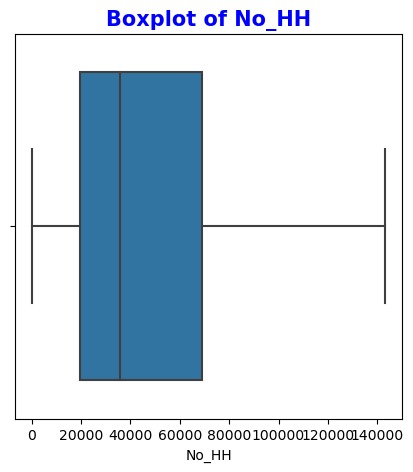

----------------------------------------------------------------------------


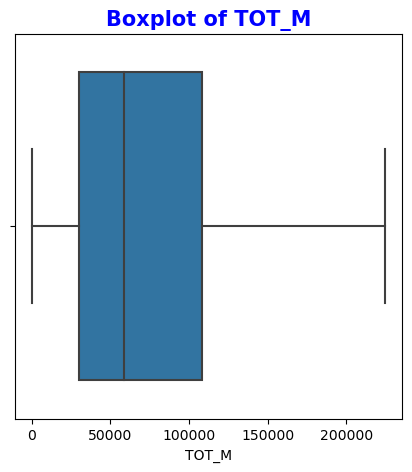

----------------------------------------------------------------------------


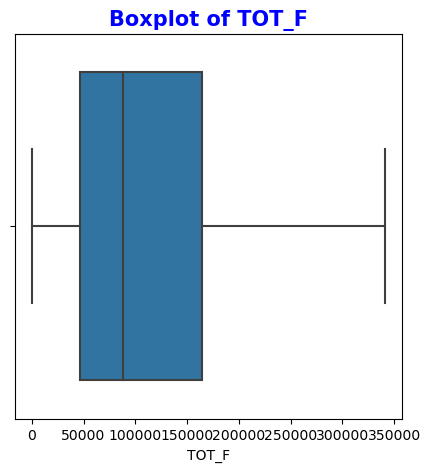

----------------------------------------------------------------------------


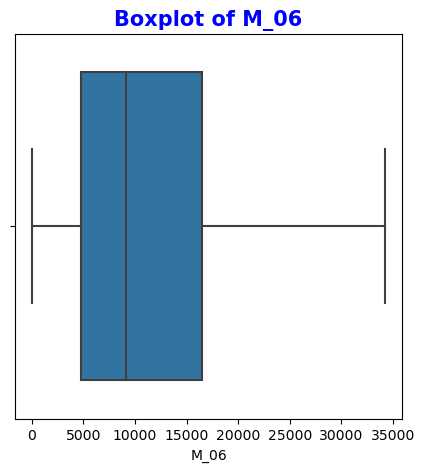

----------------------------------------------------------------------------


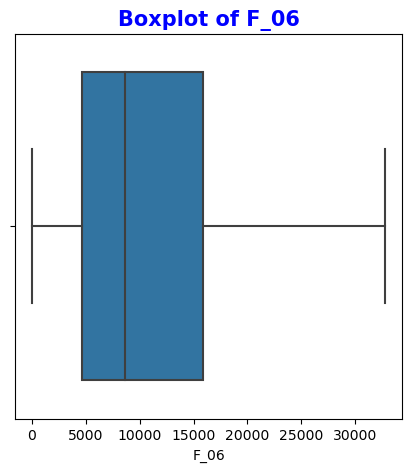

----------------------------------------------------------------------------


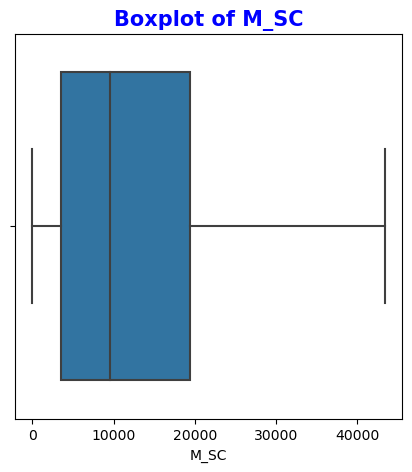

----------------------------------------------------------------------------


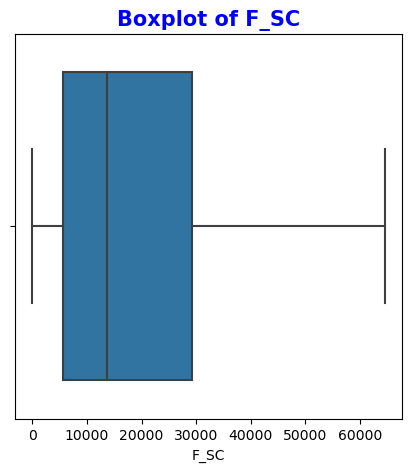

----------------------------------------------------------------------------


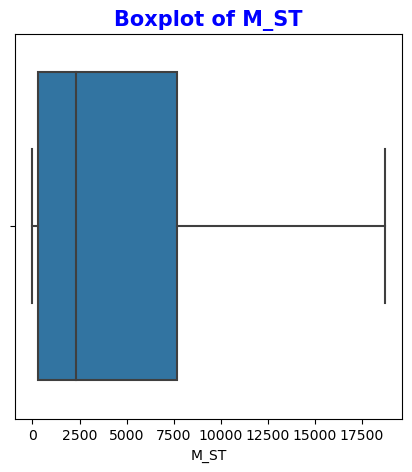

----------------------------------------------------------------------------


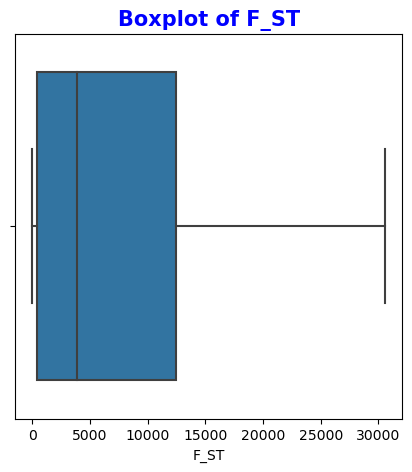

----------------------------------------------------------------------------


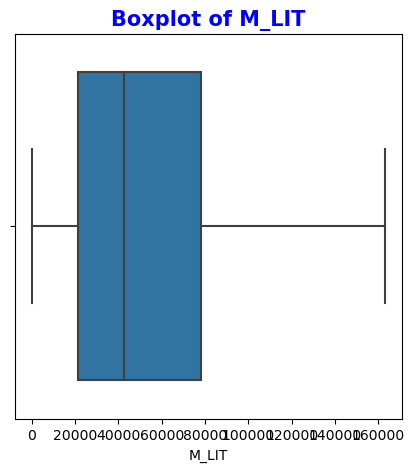

----------------------------------------------------------------------------


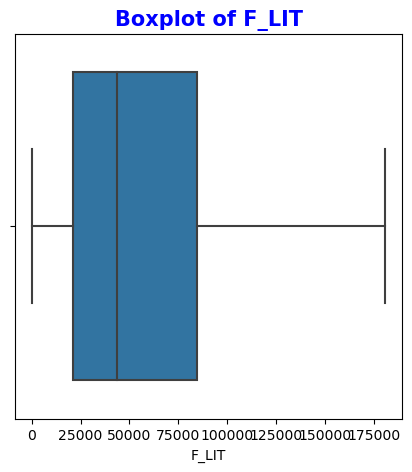

----------------------------------------------------------------------------


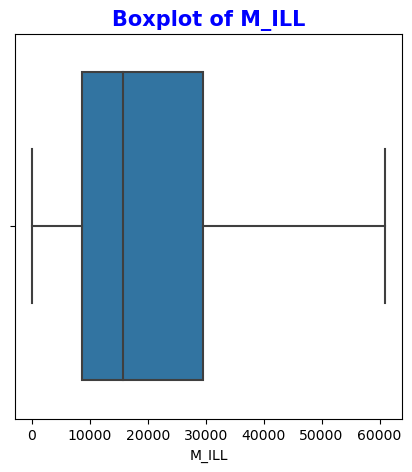

----------------------------------------------------------------------------


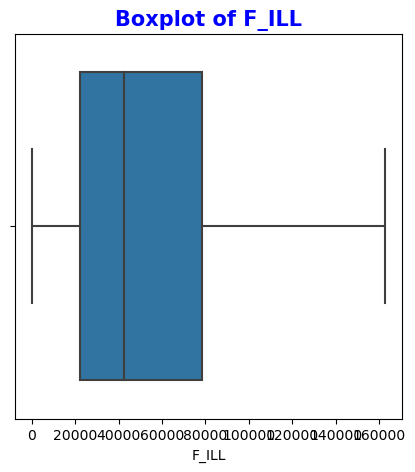

----------------------------------------------------------------------------


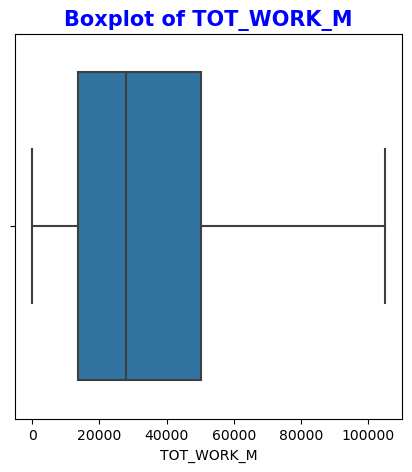

----------------------------------------------------------------------------


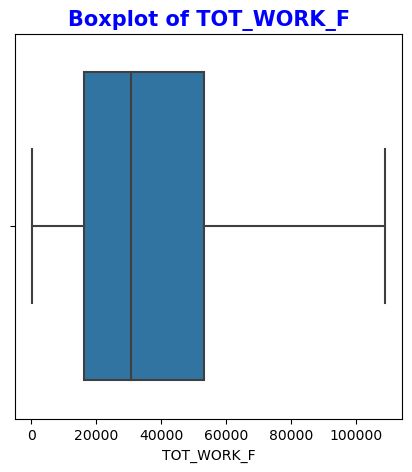

----------------------------------------------------------------------------


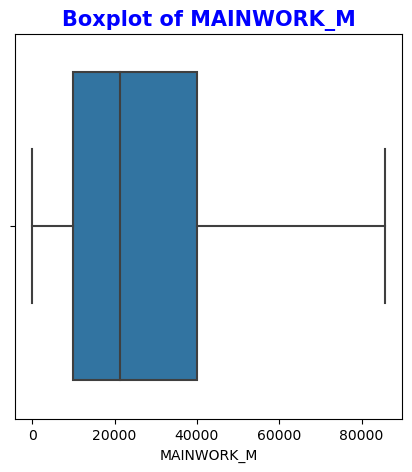

----------------------------------------------------------------------------


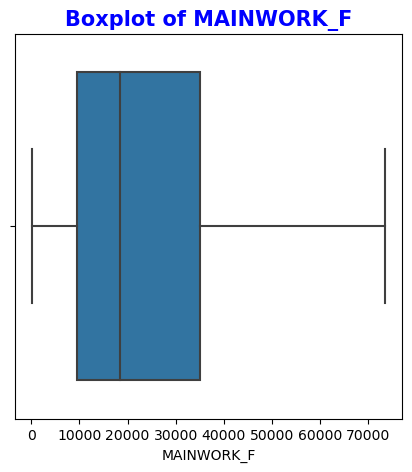

----------------------------------------------------------------------------


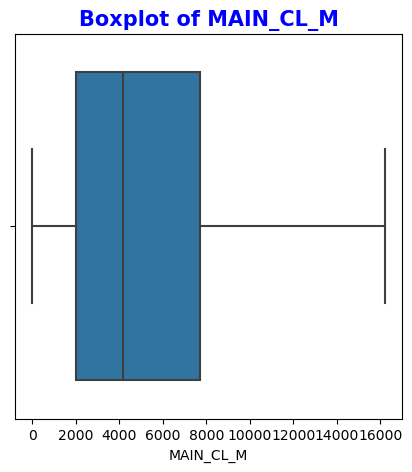

----------------------------------------------------------------------------


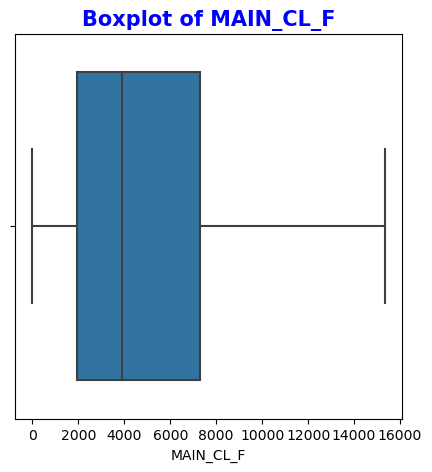

----------------------------------------------------------------------------


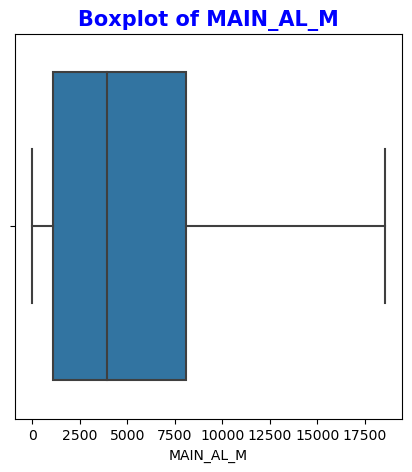

----------------------------------------------------------------------------


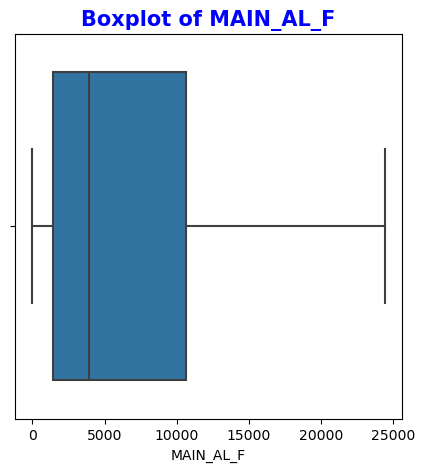

----------------------------------------------------------------------------


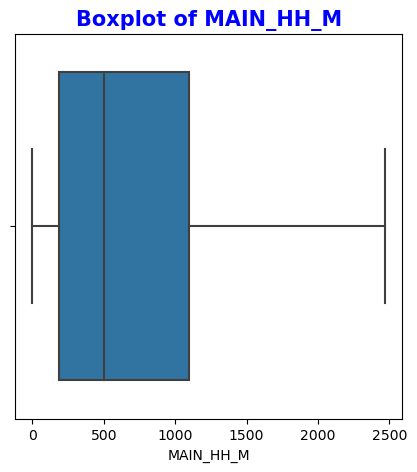

----------------------------------------------------------------------------


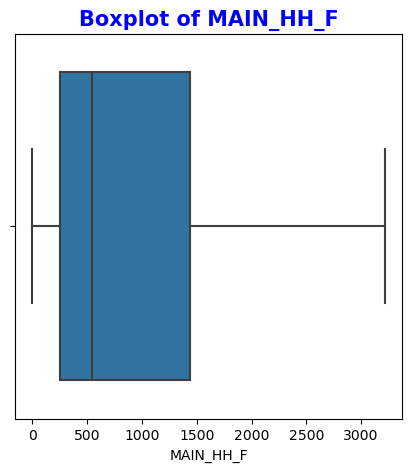

----------------------------------------------------------------------------


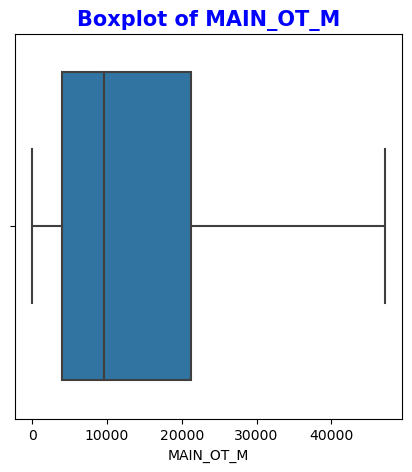

----------------------------------------------------------------------------


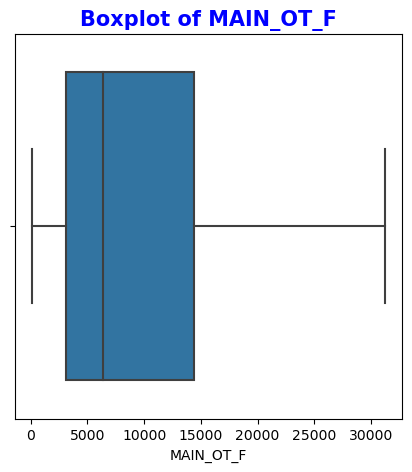

----------------------------------------------------------------------------


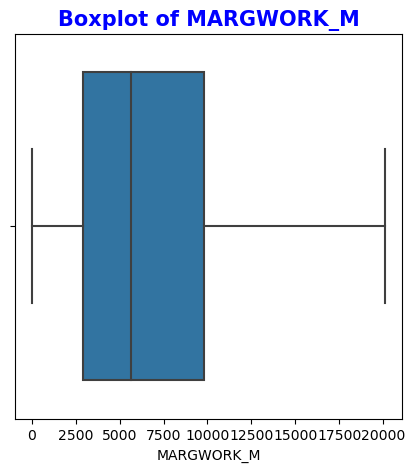

----------------------------------------------------------------------------


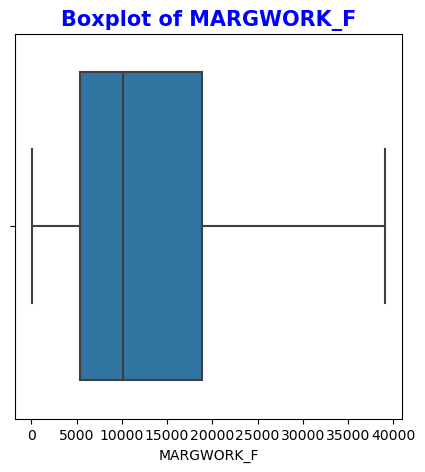

----------------------------------------------------------------------------


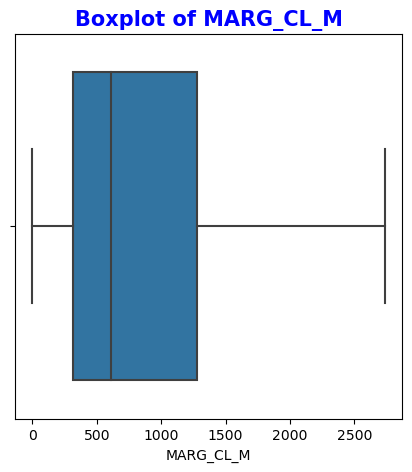

----------------------------------------------------------------------------


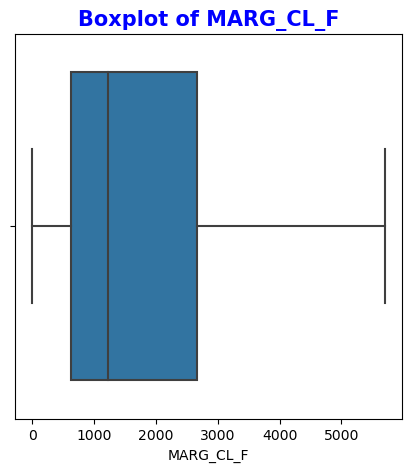

----------------------------------------------------------------------------


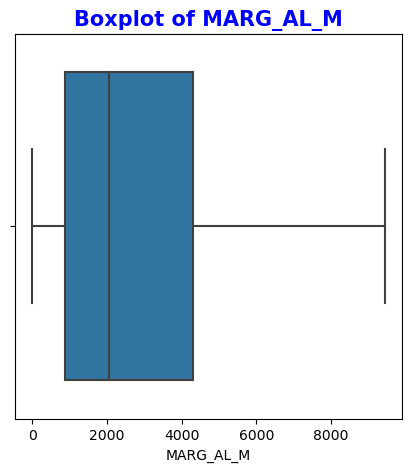

----------------------------------------------------------------------------


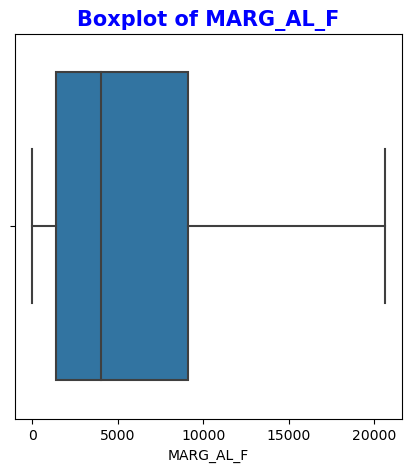

----------------------------------------------------------------------------


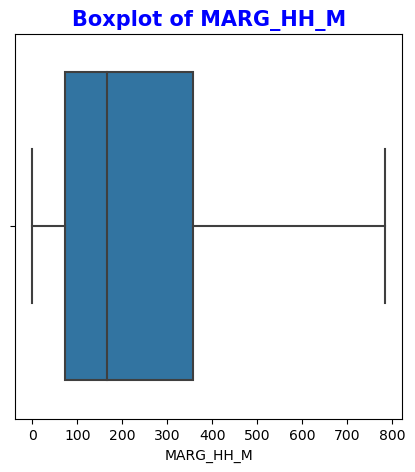

----------------------------------------------------------------------------


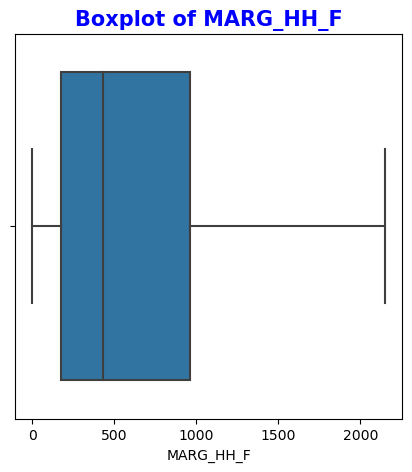

----------------------------------------------------------------------------


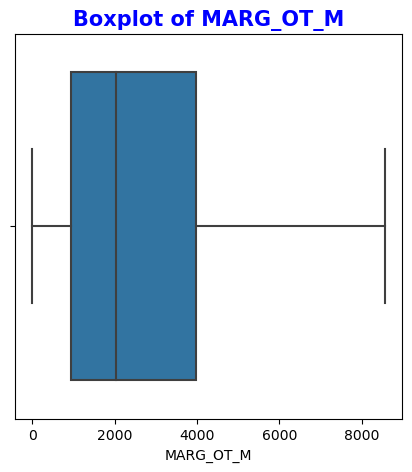

----------------------------------------------------------------------------


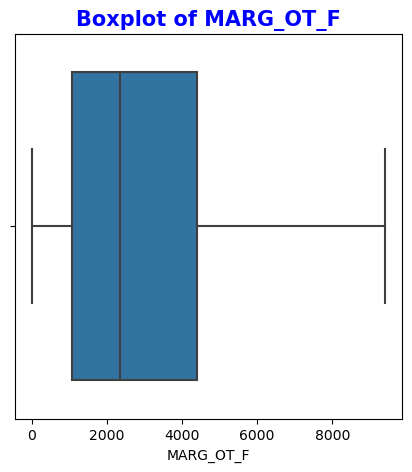

----------------------------------------------------------------------------


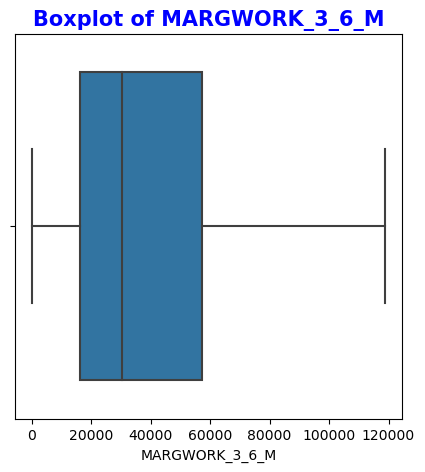

----------------------------------------------------------------------------


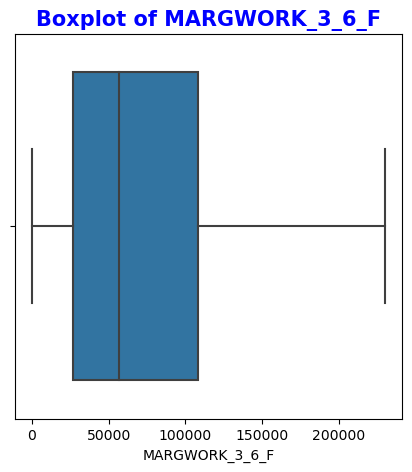

----------------------------------------------------------------------------


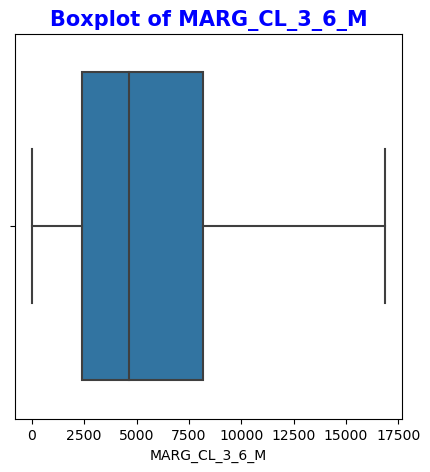

----------------------------------------------------------------------------


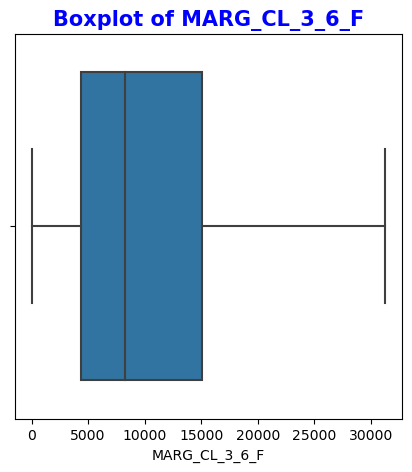

----------------------------------------------------------------------------


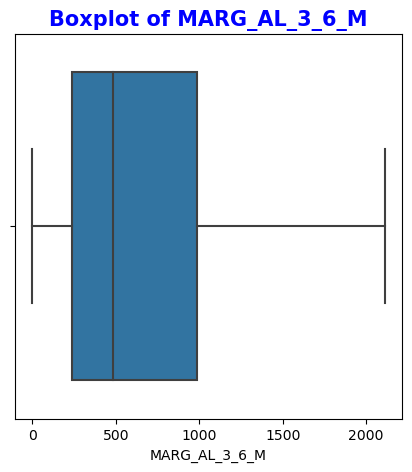

----------------------------------------------------------------------------


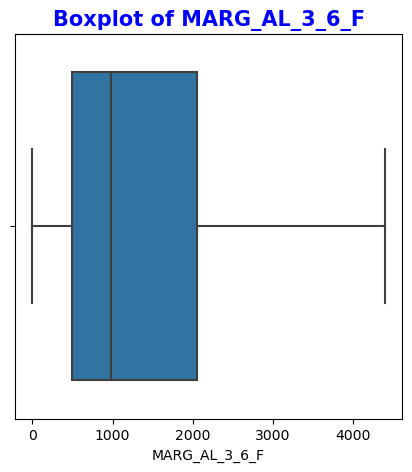

----------------------------------------------------------------------------


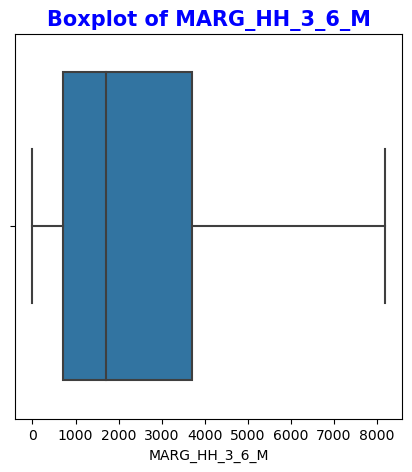

----------------------------------------------------------------------------


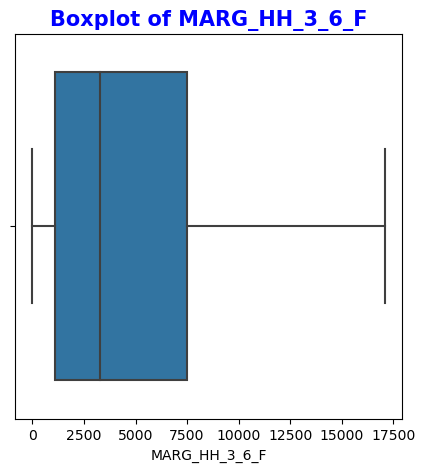

----------------------------------------------------------------------------


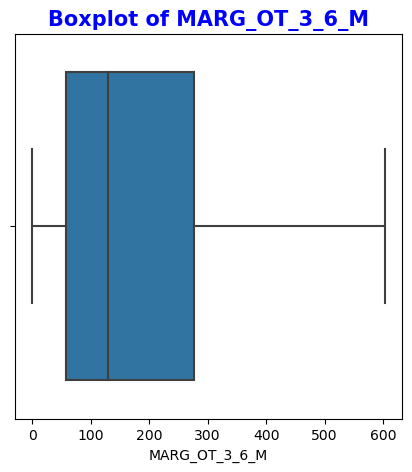

----------------------------------------------------------------------------


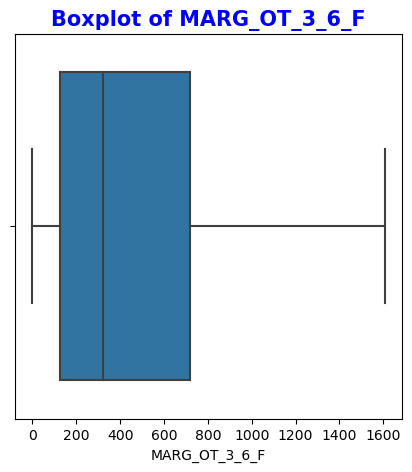

----------------------------------------------------------------------------


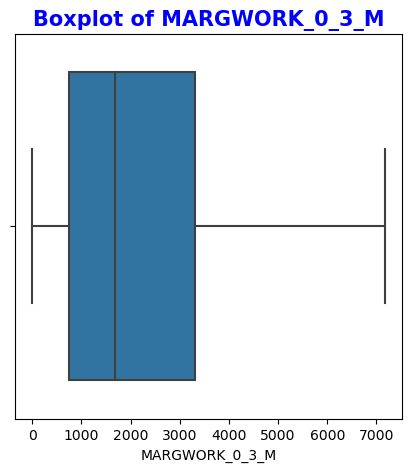

----------------------------------------------------------------------------


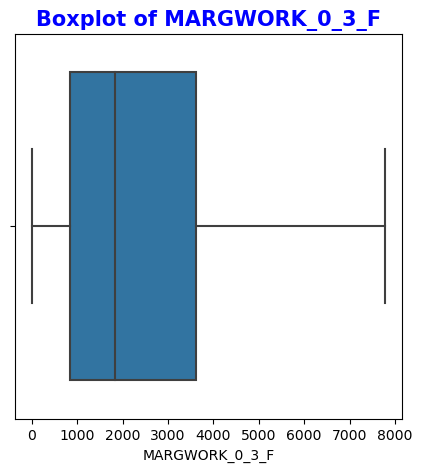

----------------------------------------------------------------------------


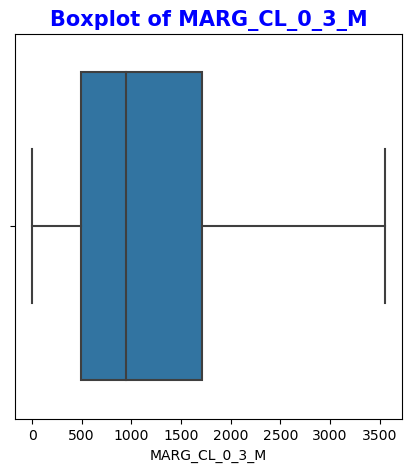

----------------------------------------------------------------------------


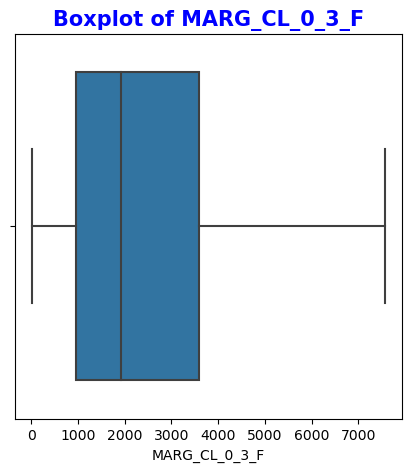

----------------------------------------------------------------------------


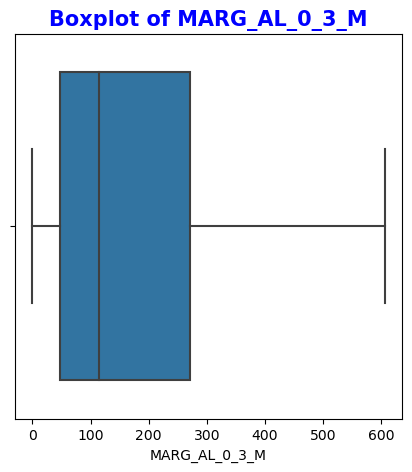

----------------------------------------------------------------------------


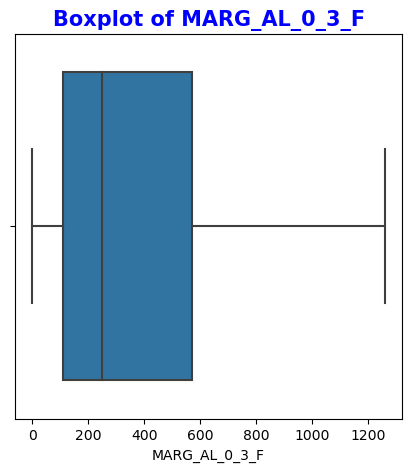

----------------------------------------------------------------------------


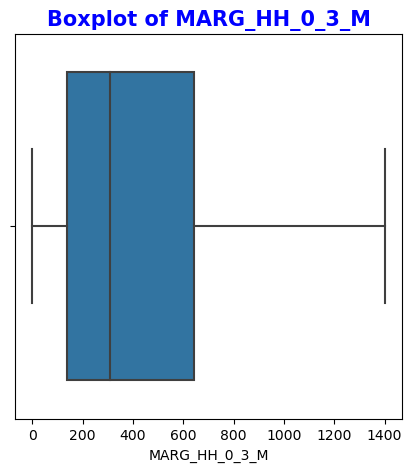

----------------------------------------------------------------------------


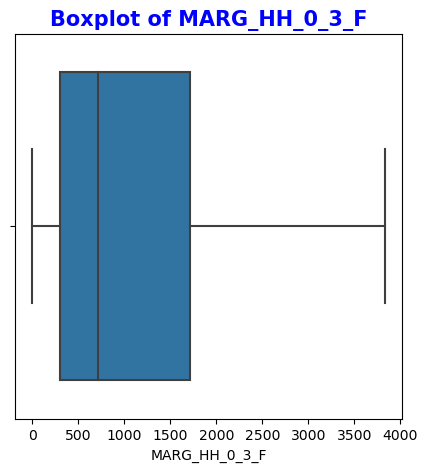

----------------------------------------------------------------------------


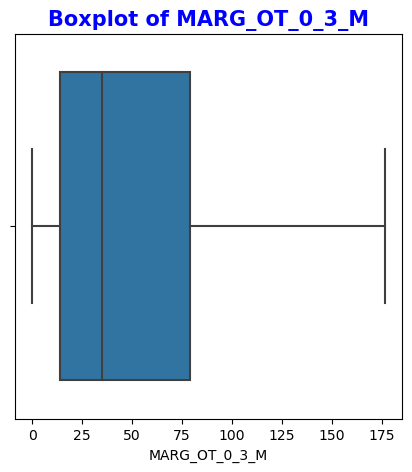

----------------------------------------------------------------------------


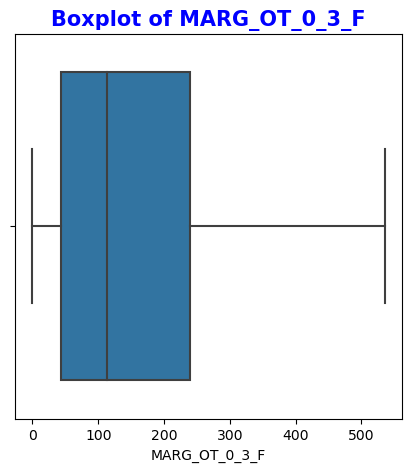

----------------------------------------------------------------------------


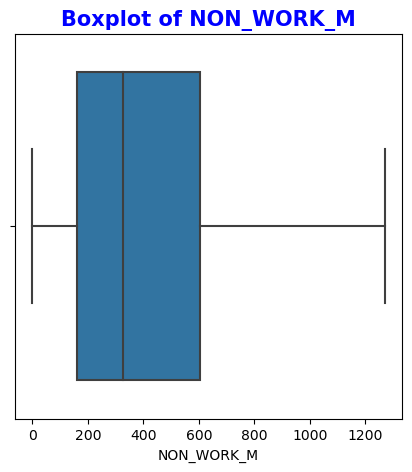

----------------------------------------------------------------------------


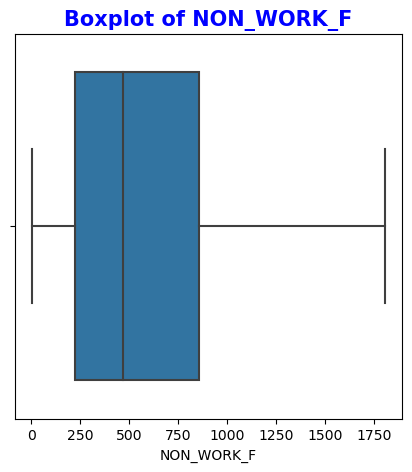

In [43]:
for i in list(data.columns):
    Boxplot_numeric(i)

In [44]:
from sklearn.preprocessing import StandardScaler
data_cleaned_scaled = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)

In [45]:
data_cleaned_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,-6.661338e-17,1.000782,-1.226295,-0.739143,-0.322796,0.518785,2.405677
TOT_M,640.0,-1.332268e-16,1.000782,-1.256930,-0.761190,-0.294128,0.529633,2.465868
TOT_F,640.0,-2.220446e-17,1.000782,-1.253026,-0.755432,-0.307934,0.523139,2.440995
M_06,640.0,5.551115e-17,1.000782,-1.252604,-0.746705,-0.268114,0.528005,2.440070
F_06,640.0,-3.330669e-17,1.000782,-1.245270,-0.731026,-0.286462,0.519980,2.396488
M_SC,640.0,2.220446e-17,1.000782,-1.080447,-0.796150,-0.293766,0.513154,2.477110
F_SC,640.0,-2.220446e-17,1.000782,-1.079963,-0.773791,-0.330877,0.514489,2.446907
M_ST,640.0,-4.440892e-17,1.000782,-0.842834,-0.793989,-0.454820,0.430539,2.267331
F_ST,640.0,0.000000e+00,1.000782,-0.833741,-0.790834,-0.450670,0.413052,2.218881
M_LIT,640.0,-7.771561e-17,1.000782,-1.238527,-0.758902,-0.270522,0.535153,2.476235


<font color = "blue">
<font size = 5>
Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [46]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_cleaned_scaled)
p_value

0.0

In [47]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_cleaned_scaled)
kmo_model

0.9361896166653618

In [49]:
cov_matrix = np.cov(data_cleaned_scaled.T)
cov_mat= pd.DataFrame(cov_matrix,index = list(data_cleaned_scaled),columns = list(data_cleaned_scaled))
cov_mat.to_excel('covariance_matrix.xlsx')
cov_mat

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.001565,0.912699,0.973013,0.812856,0.809883,0.806713,0.858562,0.116300,0.122722,0.931350,...,0.604943,0.617144,0.092397,0.076751,0.437333,0.493311,0.603073,0.652762,0.768401,0.797884
TOT_M,0.912699,1.001565,0.980122,0.965044,0.960153,0.877158,0.861703,0.023439,0.013301,0.989312,...,0.739665,0.637775,0.233968,0.192672,0.539800,0.483744,0.758514,0.732832,0.866166,0.790717
TOT_F,0.973013,0.980122,1.001565,0.914418,0.911167,0.857664,0.876435,0.076189,0.074248,0.983281,...,0.697119,0.652550,0.185162,0.155547,0.506240,0.508029,0.702366,0.711878,0.839647,0.814642
M_06,0.812856,0.965044,0.914418,1.001565,0.999032,0.833344,0.796794,-0.006081,-0.021166,0.924761,...,0.799076,0.683667,0.353449,0.307655,0.621332,0.532533,0.797963,0.742066,0.829536,0.734333
F_06,0.809883,0.960153,0.911167,0.999032,1.001565,0.823888,0.790043,0.006803,-0.007896,0.915929,...,0.805050,0.689114,0.356906,0.310399,0.640604,0.547595,0.808822,0.753617,0.824994,0.732957
M_SC,0.806713,0.877158,0.857664,0.833344,0.823888,1.001565,0.984688,-0.096913,-0.099226,0.868007,...,0.647698,0.554284,0.189858,0.154856,0.494407,0.443808,0.693266,0.659936,0.758797,0.687931
F_SC,0.858562,0.861703,0.876435,0.796794,0.790043,0.984688,1.001565,-0.052859,-0.048597,0.862923,...,0.620049,0.572684,0.154704,0.128156,0.480220,0.475952,0.656155,0.653299,0.734524,0.705050
M_ST,0.116300,0.023439,0.076189,-0.006081,0.006803,-0.096913,-0.052859,1.001565,0.994481,0.026290,...,0.094899,0.202219,0.092618,0.093485,0.161701,0.274599,-0.027725,-0.014130,0.068662,0.169367
F_ST,0.122722,0.013301,0.074248,-0.021166,-0.007896,-0.099226,-0.048597,0.994481,1.001565,0.017617,...,0.083930,0.207070,0.071554,0.079261,0.166176,0.293964,-0.040368,-0.020496,0.053917,0.164084
M_LIT,0.931350,0.989312,0.983281,0.924761,0.915929,0.868007,0.862923,0.026290,0.017617,1.001565,...,0.694535,0.603799,0.189276,0.154402,0.466936,0.431918,0.705605,0.696924,0.868146,0.802336


In [50]:
from sklearn.decomposition import PCA
pca_decomp = PCA(n_components=57, random_state=123)
df_pca = pd.DataFrame(pca_decomp.fit_transform(data_cleaned_scaled))
eig_vals=pca_decomp.explained_variance_ #eigen values
eig_vals

array([3.56488638e+01, 7.64357559e+00, 3.76919551e+00, 2.77722349e+00,
       1.90694892e+00, 1.15490310e+00, 9.87726707e-01, 4.64629906e-01,
       3.96708513e-01, 3.22346888e-01, 2.73207369e-01, 2.35647574e-01,
       1.81401107e-01, 1.69243770e-01, 1.38592325e-01, 1.31505852e-01,
       1.03809666e-01, 9.55333831e-02, 8.58580407e-02, 8.09138742e-02,
       6.60179067e-02, 6.30797999e-02, 4.82756124e-02, 4.59506197e-02,
       4.37747566e-02, 3.19339710e-02, 2.86194563e-02, 2.75481445e-02,
       2.34340044e-02, 2.20296816e-02, 1.87487040e-02, 1.59004895e-02,
       1.39957919e-02, 1.18916465e-02, 1.11133495e-02, 9.07842645e-03,
       7.25127869e-03, 6.27213692e-03, 4.95541908e-03, 4.60667097e-03,
       3.45902033e-03, 2.18408510e-03, 2.13514664e-03, 1.92111328e-03,
       1.43840980e-03, 1.09968912e-03, 9.65752052e-04, 8.62630267e-04,
       6.51634478e-04, 5.76658846e-04, 4.35790607e-04, 3.70037468e-04,
       3.06660171e-04, 2.07854170e-04, 1.38286484e-04, 8.97034441e-05,
      

In [51]:
df_extracted_loadings = pd.DataFrame(pca_decomp.components_, 
                                     columns=data_cleaned_scaled.columns)#eigen Vector

In [52]:
df_extracted_loadings.to_excel('eigen_vector.xlsx')
df_extracted_loadings

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.149222,0.159169,0.158209,0.156340,0.156814,0.143350,0.143537,0.018849,0.017878,0.155152,...,0.142987,0.133784,0.062964,0.056741,0.119102,0.113044,0.142140,0.141370,0.147629,0.142103
1,-0.115487,-0.080239,-0.093718,-0.020341,-0.014310,-0.079667,-0.087098,0.069101,0.067316,-0.105986,...,0.136839,0.166416,0.281881,0.287541,0.182341,0.177112,0.052925,0.035109,-0.049122,-0.039848
2,0.101528,-0.038662,0.028959,-0.074419,-0.068223,-0.037619,0.021350,0.323827,0.338705,-0.032107,...,-0.103565,0.033423,-0.120293,-0.088097,0.026176,0.164774,-0.144419,-0.102175,-0.126673,-0.028545
3,0.076814,0.052976,0.070022,0.028520,0.016398,0.010210,0.016244,0.091143,0.079554,0.089187,...,-0.018223,0.005954,0.208941,0.240499,-0.240416,-0.189408,-0.167554,-0.169020,0.024036,0.057402
4,-0.012090,-0.042344,-0.022927,-0.080339,-0.078326,-0.167893,-0.158092,0.418412,0.415965,-0.014033,...,0.094293,0.112351,-0.018070,-0.036293,0.016981,0.047538,0.014187,0.047504,0.191790,0.249765
5,0.082558,0.073667,0.082812,0.092379,0.080010,0.050969,0.054568,-0.231809,-0.214542,0.081378,...,0.111045,0.185882,-0.004600,0.022023,0.109387,0.189006,-0.149689,-0.233858,0.022904,0.042834
6,0.106896,-0.124085,-0.010291,-0.200807,-0.203411,-0.040399,0.053990,-0.355238,-0.327677,-0.067062,...,-0.025902,0.178500,0.009474,0.066497,-0.082858,0.109686,-0.050786,0.194686,-0.016338,0.175252
7,-0.099515,-0.108870,-0.115276,-0.132944,-0.139342,0.189170,0.177363,-0.071632,-0.078392,-0.102886,...,0.018271,-0.004071,-0.115859,-0.095449,-0.048660,-0.070176,0.038886,-0.151042,0.232577,0.325866
8,0.026100,0.032856,0.036405,0.138404,0.165715,-0.531744,-0.515063,-0.113019,-0.136031,-0.017445,...,-0.004772,-0.023984,-0.134057,-0.134239,-0.093357,-0.137706,0.075351,0.038072,0.013669,0.050915
9,0.068124,-0.048423,-0.022468,-0.157252,-0.145040,-0.098447,-0.065840,-0.008382,-0.028617,0.000581,...,0.106542,0.008600,0.180268,0.042602,0.160398,-0.045480,-0.084096,0.085163,0.033439,0.023700


In [53]:
eig_var=pca_decomp.explained_variance_ratio_*100
eig_var

array([6.24441446e+01, 1.33888289e+01, 6.60229147e+00, 4.86470891e+00,
       3.34029704e+00, 2.02297994e+00, 1.73014629e+00, 8.13866529e-01,
       6.94892379e-01, 5.64637229e-01, 4.78562250e-01, 4.12770833e-01,
       3.17750294e-01, 2.96454958e-01, 2.42764517e-01, 2.30351534e-01,
       1.81837655e-01, 1.67340548e-01, 1.50392785e-01, 1.41732362e-01,
       1.15639919e-01, 1.10493400e-01, 8.45617224e-02, 8.04891611e-02,
       7.66778221e-02, 5.59369722e-02, 5.01311201e-02, 4.82545623e-02,
       4.10480504e-02, 3.85881758e-02, 3.28410688e-02, 2.78520087e-02,
       2.45156553e-02, 2.08299401e-02, 1.94666401e-02, 1.59021779e-02,
       1.27016642e-02, 1.09865556e-02, 8.68013375e-03, 8.06925096e-03,
       6.05897475e-03, 3.82574118e-03, 3.74001838e-03, 3.36510796e-03,
       2.51958296e-03, 1.92626466e-03, 1.69165450e-03, 1.51102177e-03,
       1.14143210e-03, 1.01010143e-03, 7.63350323e-04, 6.48174183e-04,
       5.37159674e-04, 3.64086663e-04, 2.42228792e-04, 1.57128566e-04,
      

In [54]:
cum_var_exp=pca_decomp.explained_variance_ratio_.cumsum()*100
cum_var_exp

array([ 62.44414463,  75.83297358,  82.43526505,  87.29997396,
        90.64027099,  92.66325093,  94.39339722,  95.20726375,
        95.90215613,  96.46679336,  96.94535561,  97.35812644,
        97.67587673,  97.97233169,  98.21509621,  98.44544774,
        98.6272854 ,  98.79462594,  98.94501873,  99.08675109,
        99.20239101,  99.31288441,  99.39744613,  99.47793529,
        99.55461311,  99.61055009,  99.66068121,  99.70893577,
        99.74998382,  99.788572  ,  99.82141306,  99.84926507,
        99.87378073,  99.89461067,  99.91407731,  99.92997949,
        99.94268115,  99.95366771,  99.96234784,  99.97041709,
        99.97647607,  99.98030181,  99.98404183,  99.98740693,
        99.98992652,  99.99185278,  99.99354444,  99.99505546,
        99.99619689,  99.99720699,  99.99797034,  99.99861851,
        99.99915567,  99.99951976,  99.99976199,  99.99991912,
       100.        ])

<font color = "blue">
<font size = 5>
Part 2 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [55]:
eigen_values = pd.DataFrame({'PC':range(1,58),'Eigen_Values':eig_vals,'Cumulative_Variance_Explained':cum_var_exp})
eigen_values['Variance_Explained'] = eig_var
eigen_values = eigen_values[['PC','Eigen_Values','Variance_Explained','Cumulative_Variance_Explained']]
eigen_values

,PC,Eigen_Values,Variance_Explained,Cumulative_Variance_Explained
0,1,35.648864,62.444145,62.444145
1,2,7.643576,13.388829,75.832974
2,3,3.769196,6.602291,82.435265
3,4,2.777223,4.864709,87.299974
4,5,1.906949,3.340297,90.640271
5,6,1.154903,2.022980,92.663251
6,7,0.987727,1.730146,94.393397
7,8,0.464630,0.813867,95.207264
8,9,0.396709,0.694892,95.902156
9,10,0.322347,0.564637,96.466793


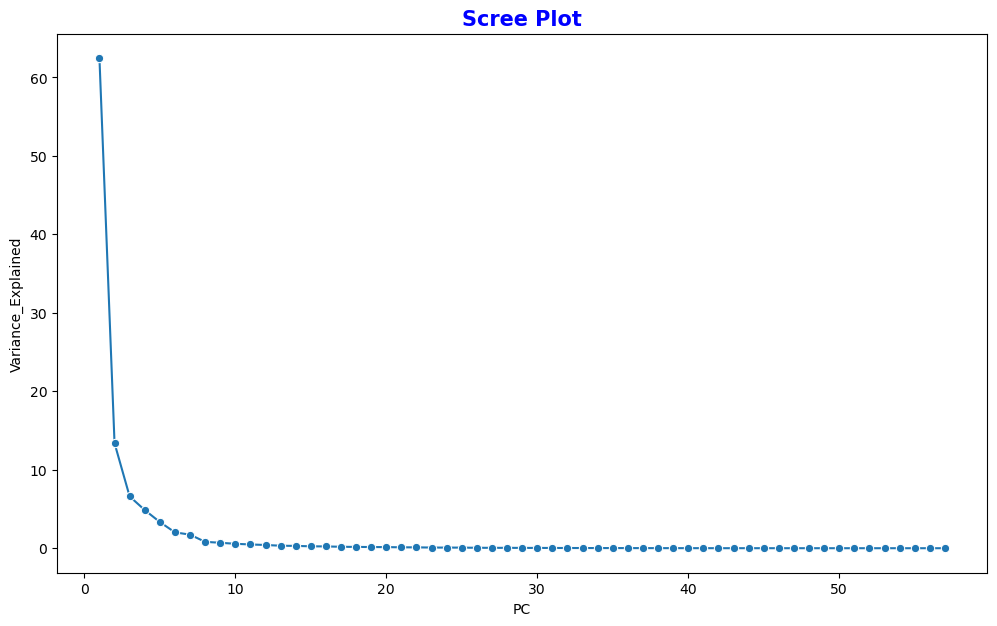

In [56]:
plt.figure(figsize=(12,7))
sns.lineplot(y='Variance_Explained',x='PC',data=eigen_values,marker='o')
plt.title('Scree Plot',fontsize=15,weight='bold',color="Blue")
plt.show()

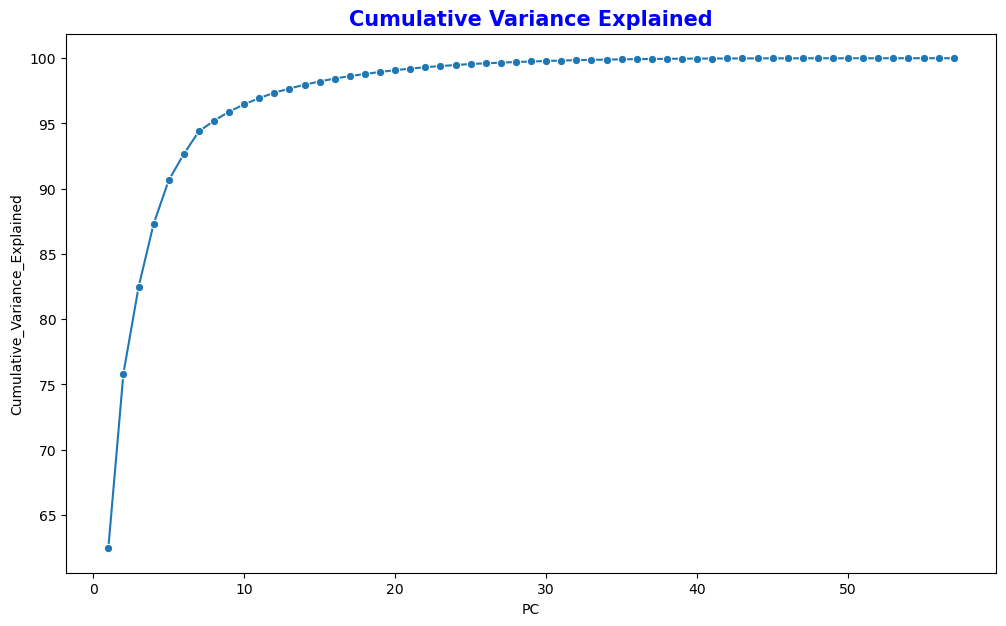

In [57]:
plt.figure(figsize=(12,7))
sns.lineplot(y='Cumulative_Variance_Explained',x='PC',data=eigen_values,marker='o')
plt.title('Cumulative Variance Explained',fontsize=15,weight='bold',color="Blue")
plt.show()

In [58]:
from sklearn.decomposition import PCA
pca_decomp = PCA(n_components=5, random_state=123)
df_pca = pd.DataFrame(pca_decomp.fit_transform(data_cleaned_scaled),columns=['PCA-1','PCA-2','PCA-3','PCA-4','PCA-5'])
df_pca.head()

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5
0,-5.528161,0.430378,-1.473827,-1.278049,0.376358
1,-5.492016,-0.106110,-2.015641,-1.750168,-0.006857
2,-7.474643,-0.217194,-0.247428,0.006079,0.556282
3,-7.919737,-0.652311,-0.659220,-0.735550,0.272465
4,-5.175695,2.304059,-1.157327,1.060796,1.080249


In [59]:
df_pca

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5
0,-5.528161,0.430378,-1.473827,-1.278049,0.376358
1,-5.492016,-0.106110,-2.015641,-1.750168,-0.006857
2,-7.474643,-0.217194,-0.247428,0.006079,0.556282
3,-7.919737,-0.652311,-0.659220,-0.735550,0.272465
4,-5.175695,2.304059,-1.157327,1.060796,1.080249
...,...,...,...,...,...
635,-7.946040,-1.302846,-0.819360,-0.871301,-0.101966
636,-7.244719,-1.396520,-0.719443,-0.895934,-0.062742
637,-7.886268,-1.003537,-0.909285,-1.238009,0.146031
638,-7.864260,-0.999338,-0.851569,-0.782561,-0.081681


<font color = "blue">
<font size = 5>
Part 2 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [60]:
pca_decomp.explained_variance_

array([35.64886379,  7.64357559,  3.76919551,  2.77722349,  1.90694892])

In [61]:
pca_decomp.explained_variance_ratio_

array([0.62444145, 0.13388829, 0.06602291, 0.04864709, 0.03340297])

In [62]:
pca_decomp.explained_variance_ratio_.cumsum()

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271])

In [63]:
df_pca_comp = pd.DataFrame(pca_decomp.components_,
                           columns=list(data_cleaned_scaled),index=['PCA-1','PCA-2','PCA-3','PCA-4','PCA-5'])

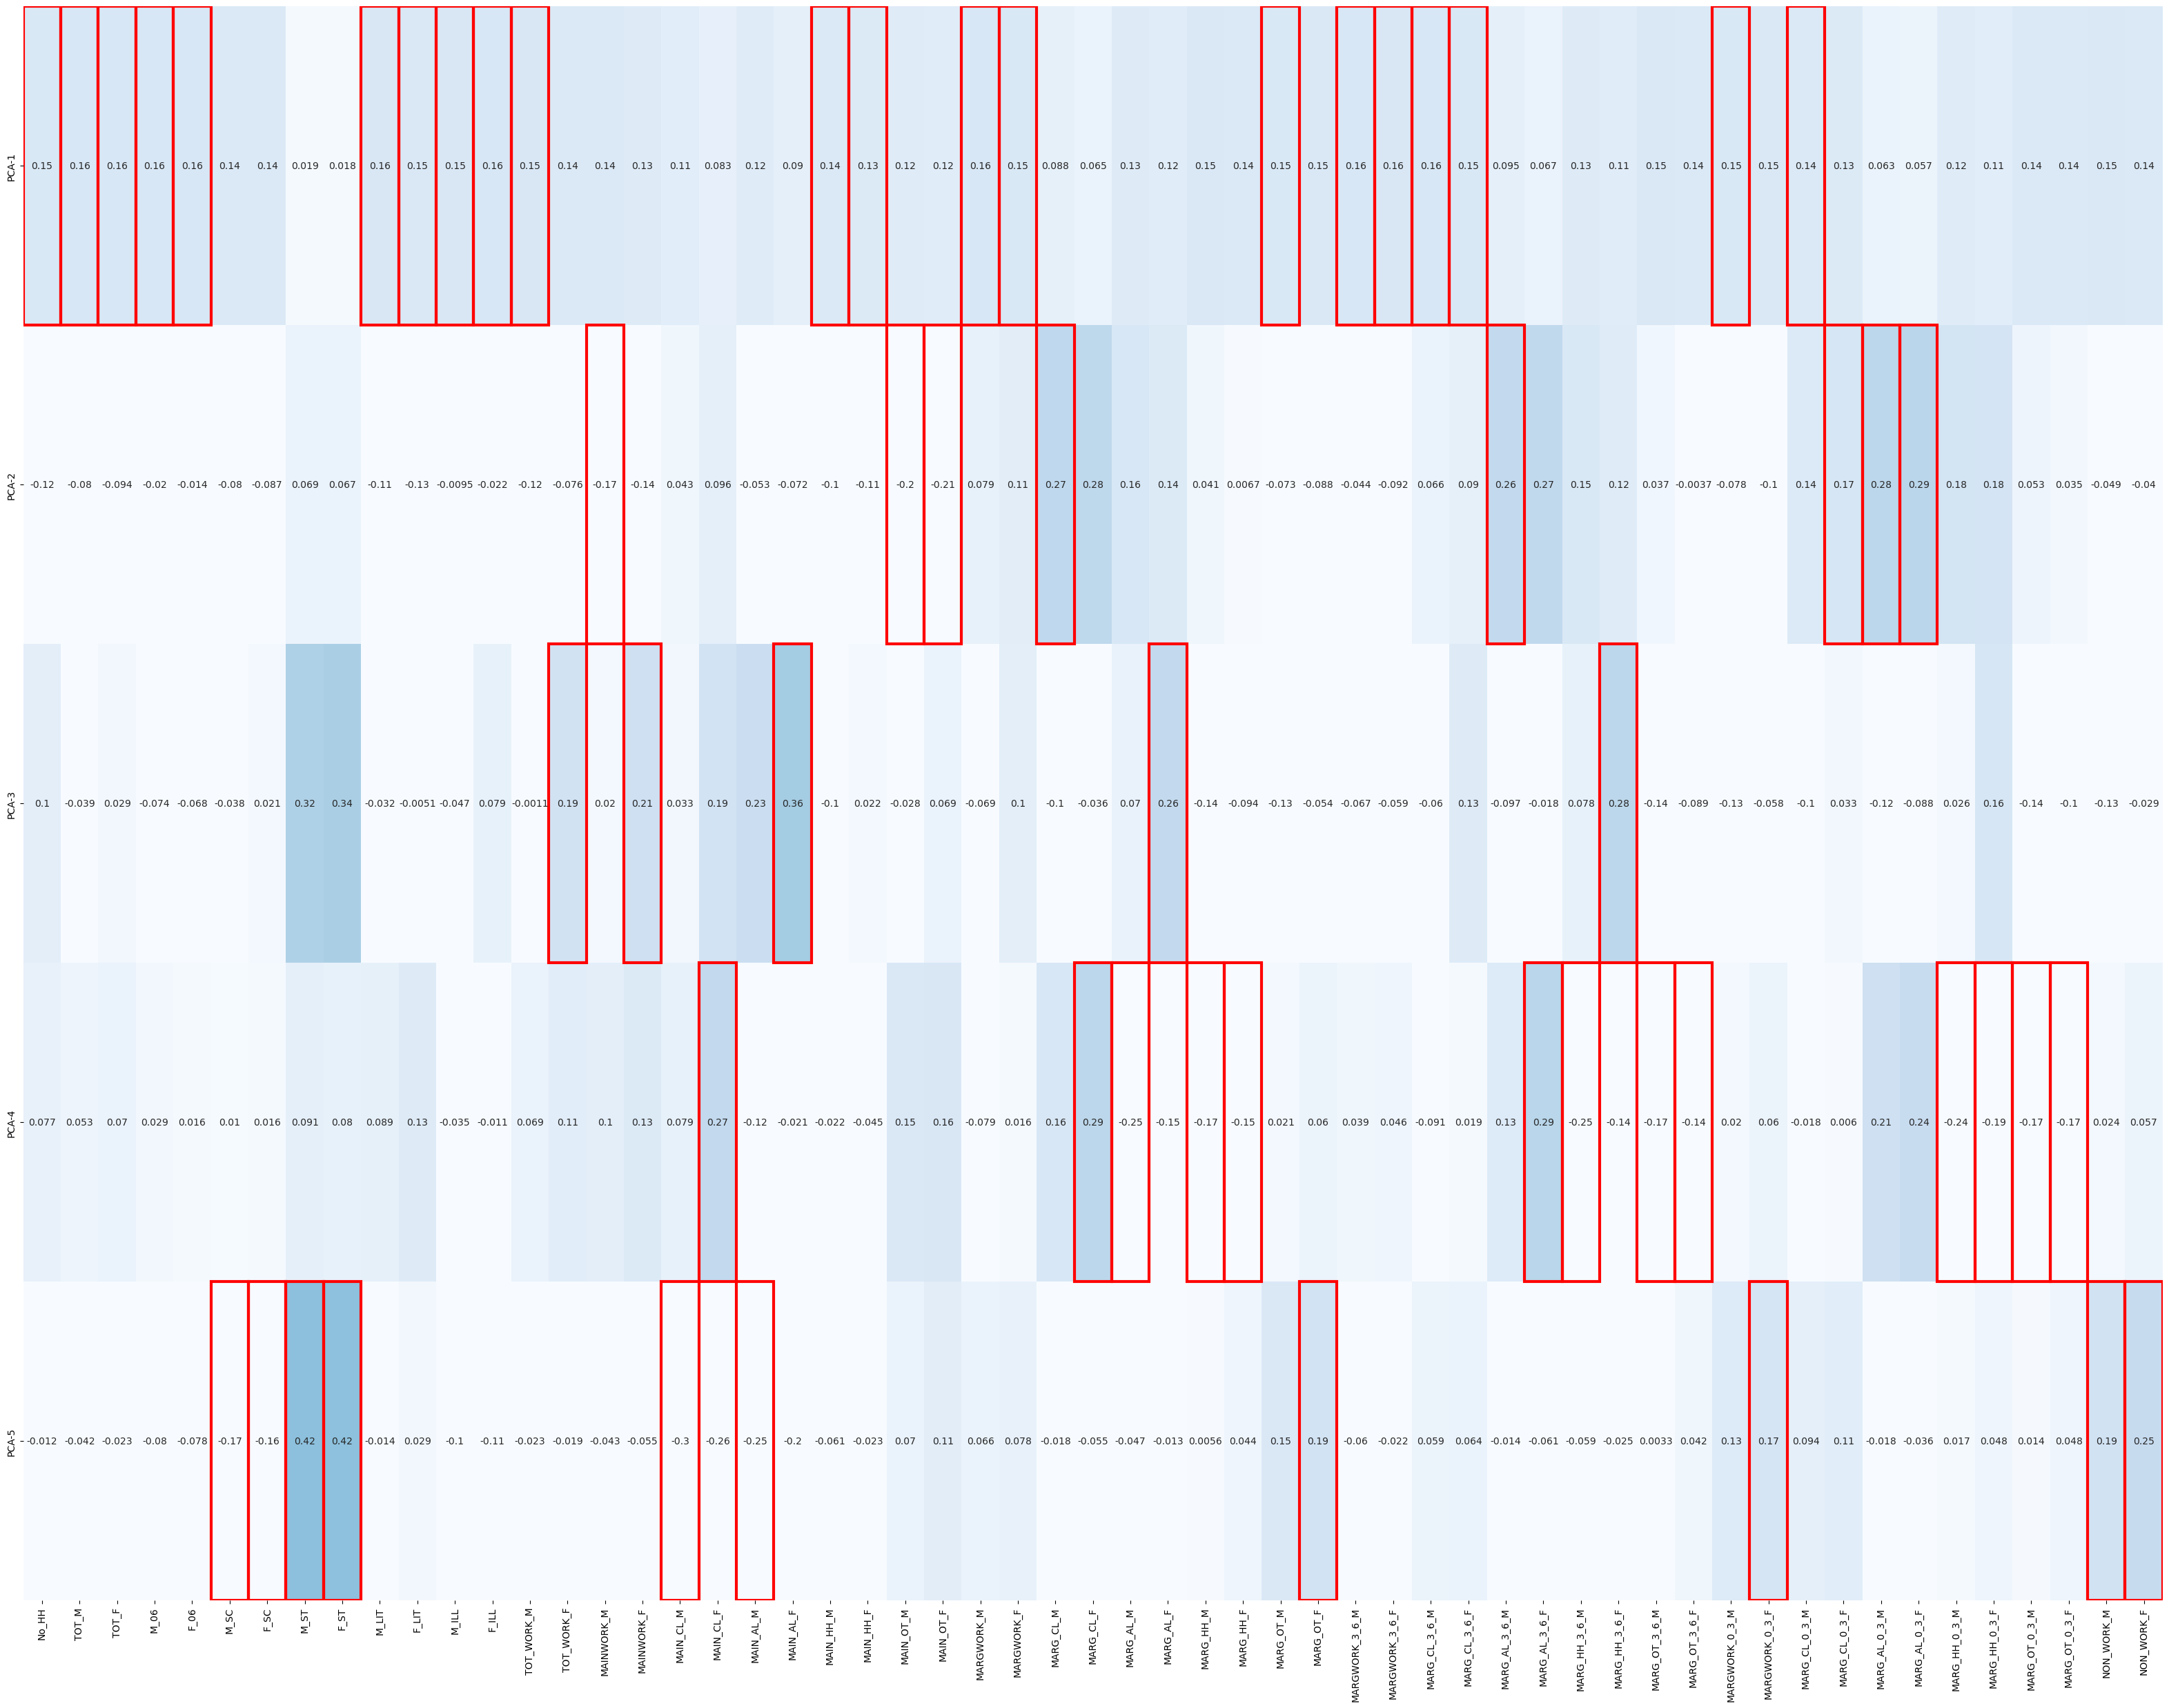

In [64]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize=(40, 30), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_comp, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PCA-1','PCA-2','PCA-3','PCA-4','PCA-5'])
column_max = df_pca_comp.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_comp.columns):
    position = df_pca_comp.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [65]:
column_max

No_HH             PCA-1
TOT_M             PCA-1
TOT_F             PCA-1
M_06              PCA-1
F_06              PCA-1
M_SC              PCA-5
F_SC              PCA-5
M_ST              PCA-5
F_ST              PCA-5
M_LIT             PCA-1
F_LIT             PCA-1
M_ILL             PCA-1
F_ILL             PCA-1
TOT_WORK_M        PCA-1
TOT_WORK_F        PCA-3
MAINWORK_M        PCA-2
MAINWORK_F        PCA-3
MAIN_CL_M         PCA-5
MAIN_CL_F         PCA-4
MAIN_AL_M         PCA-5
MAIN_AL_F         PCA-3
MAIN_HH_M         PCA-1
MAIN_HH_F         PCA-1
MAIN_OT_M         PCA-2
MAIN_OT_F         PCA-2
MARGWORK_M        PCA-1
MARGWORK_F        PCA-1
MARG_CL_M         PCA-2
MARG_CL_F         PCA-4
MARG_AL_M         PCA-4
MARG_AL_F         PCA-3
MARG_HH_M         PCA-4
MARG_HH_F         PCA-4
MARG_OT_M         PCA-1
MARG_OT_F         PCA-5
MARGWORK_3_6_M    PCA-1
MARGWORK_3_6_F    PCA-1
MARG_CL_3_6_M     PCA-1
MARG_CL_3_6_F     PCA-1
MARG_AL_3_6_M     PCA-2
MARG_AL_3_6_F     PCA-4
MARG_HH_3_6_M   

<font color = "blue">
<font size = 5>
Part 2 - PCA: Write linear equation for first PC.

In [66]:
for i in range(0,57):
    print("(",np.round(pca_decomp.components_[0][i],2),")",'*',data_cleaned_scaled.columns[i],end=' + ')

( 0.15 ) * No_HH + ( 0.16 ) * TOT_M + ( 0.16 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.14 ) * M_SC + ( 0.14 ) * F_SC + ( 0.02 ) * M_ST + ( 0.02 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.15 ) * M_ILL + ( 0.16 ) * F_ILL + ( 0.15 ) * TOT_WORK_M + ( 0.14 ) * TOT_WORK_F + ( 0.14 ) * MAINWORK_M + ( 0.13 ) * MAINWORK_F + ( 0.11 ) * MAIN_CL_M + ( 0.08 ) * MAIN_CL_F + ( 0.12 ) * MAIN_AL_M + ( 0.09 ) * MAIN_AL_F + ( 0.14 ) * MAIN_HH_M + ( 0.13 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.12 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.15 ) * MARGWORK_F + ( 0.09 ) * MARG_CL_M + ( 0.07 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.12 ) * MARG_AL_F + ( 0.15 ) * MARG_HH_M + ( 0.14 ) * MARG_HH_F + ( 0.15 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.16 ) * MARG_CL_3_6_M + ( 0.15 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.07 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.15 ) * MARG_OT_3_6_M + ( 